# Finding Correlations Between Chattanooga Crime and Covid-19 Data

##### by Chase Carroll

##### [Video Presentation Link](https://youtu.be/QbIHRPXgMPI)

## Abstract

This study seeks to observe any causal relationship between the rise in Covid-19 in Hamilton county and Chattanooga Police Department (CPD) arrests. By looking for a relationship, if it exists, the effects of such a pandemic could be recorded and potentially extrapolated for similar future events, aiding the CPD and other city entities in handling crime more effectively under such conditions. After analysis of both Covid-19 and CPD arrests data during a select time period from the start of infection case tracking in Hamilton county, it was found that, in general, arrest rates- and presumably crime rates- went down over the course of the select time period, which included both a rise of Covid-19 cases to a peak and a gradual descent. Certain kinds of crime were of note, notably vehicular crimes- which dramatically decreased- and domestic issues related to restraining orders- which saw an increase. Given these findings, recommendations on the future wellfare of Chattanooga are given, with a particular emphasis on measures that foster greater community bonding during times of isolation.

## Table of Contents

1. Introduction


2. Methods

    2.1 Questions and Hypotheses
    
    
3. Materials


4. Results

    4.1 Imports
    
    4.2 Load datasets from local files
    
    4.3 Exploring CPD data
    
        4.3.1 Setup dataframe
        4.3.2 Explore covid-period CPD data with statistics
            4.3.2.1 Explore by crime
            4.3.2.2 Explore by time period
            4.3.2.3 Explore by time period and crime
        4.3.3 Explore data through visualization
            4.3.3.1 Linear regression: Crime vs. time
            4.3.3.2 Pre-Covid-19 period crime data
            4.3.3.3 Intersecting crimes: Pre-covid & post-covid
            4.3.3.4 Intersecting crimes: Plot by crime
            4.3.3.5 Non-intersecting crimes: Pre-covid & post-covid
            
    4.4 Prepare and plot Covid-19 data
    
    4.5 Overlays & dataset combination
    
        4.5.1 Overlay frequency in CPD and daily cases in Covid
        
5. Discussion

    5.1 R1: Has crime shown a positive or negative trend during the uptick in Covid-19?
    
    5.2 R2: What crimes were most prevalent in Hamilton Co. before Covid-19?
    
    5.3 R3: What crimes were most prevalent in Hamilton Co. after Covid-19?
    
    5.4 H1: Lesser crimes (drunkenness, shoplifting) will be more prevalent during the pandemic.
    
    5.5 H2: Domestic crime will see an increase during the pandemic.
    
    5.6 Future Study
    
    
6. Conclusions


7. References

## 1 Introduction

Covid-19 is one of the largest public health disasters of our generation, if not the largest. Beyond the symptoms for those unfortunate enough to catch it, the virus has had numerous effects on the daily lives of even those with no exposure. From public lockdowns, to quarantining, mask mandates, and the transition to an online workplace, many of the day-to-day functions of our world have been disrupted or altered. However, amidst all this organized chaos is the question of what has occurred to the crime in Chattanooga, TN. This is already an often unseen issue for most of the citizenry outside of reports on the local news, so perhaps it would have been possible that during our distraction the crime decreased significantly, changed, or was inexplicably unaffected.

The importance of knowing this information extends beyond public safety intelligence, though that is likely to be the primary benefactor. Knowledge about the influence of an extreme, abnormal, and global event upon the crime rates could give interesting insights into the patterns of behavior expected for such an unusual event. While such information would not be very practically useful outside of such trying times, it would provide reference material for the police for any similar future events, and it would also be an invaluable case study of the virus' effect on a population.

This project's purpose is thus to analyze a selection of data pulled from both Hamilton county's covid-19 cases, as well as the Chattanooga Police Department's (CPD) arrests, to see if any changes in one appeared to correlate with changes in the other. Additionally, hypotheses on which crimes would be affected by the rise in daily covid cases have been suggested and tested.

## 2 Methods

In order to perform data analysis, a collection of Python libraries are used, including but not limited to: pandas, numpy, and matplotlib. The primary means by which the data will be analyzed for correlations shall be through plot visualizations, such as scatter plots with trendlines. Line plots were originally posited as another kind of visualization to be used, but they have been applied sparingly, as issues with data smoothing resulted in less than ideal visualizations that were difficult to read. Additionally, functionality for exploring the CPD arrests data numerically has been included as well, which can provide information about specific time periods and crimes if desired.

### 2.1 Questions and Hypotheses

The research (R) questions for this study are as follows:

1. Has crime has shown a positive or negative correlation with the uptick in coronavirus?
2. What types of crime were most prevalent before cases appeared in Hamilton county?
3. What types of crime are most prevalent after cases appeared in Hamilton county?

The hypotheses (H) for this study are as follows:

1. Lesser crimes such as drunkenness and shop lifting will become more common during the pandemic than other crimes.
2. Domestic (home, community) crime will see an increase during the pandemic.

## 3 Materials

The datasets used in this project are the Public CPD Arrests dataset and the Covid-19 Confirmed Cases Time Series dataset. Links to both can be found below and in the references section at the end of the report.

NOTE: Though the source of the materials is provided here, the code has not been adapted to daily changes. As such, only the datasets provided in the .zip file along with this .ipynb file should be used.

https://www.chattadata.org/Public-Safety/Public-CPD-Arrests/hhdc-a448 [1]

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv [2]

## 4 Results

The results will be covered in the following code. Most results will come about from observations of the data visualizations, but the statistical exploration code blocks allow for self-guided inquiry and more basic analysis. Note that the research questions and hypotheses will not be formally addressed in this section with their own subsections, but they will be covered in section 5, Discussion, and onward.

### 4.1 Imports

In [32]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import tqdm
import seaborn as sea
from datetime import datetime
from datetime import date
import datetime
from scipy.interpolate import interp1d

### 4.2 Load datasets from local files 

The range of records being chosen for analysis here is equal, date-wise, between the two datasets. This was done so that comparing the two would accurately show similarities and differences on a day-by-day timescale. Additionally, these are offline files, so they may not be representative of more recent developments in arrests or covid cases. Findings from this study should thus be viewed as historical.

In [33]:
cpd_df = pd.read_csv("Public_CPD_Arrests.csv")
r_cpd_df = cpd_df[18580:23980] #crime during track of covid data
p_cpd_df = cpd_df[18580-(23980-18580)*2:18580] #double the period before Covid-19 tracking began, i.e., no known cases
del(cpd_df) #conserve memory
cov_df = pd.read_csv("time_series_covid19_confirmed_US.csv")
r_cov_df = cov_df.loc[(cov_df['Province_State'] == 'Tennessee') & (cov_df['Admin2'] == 'Hamilton')] #covid data for Hamilton county, TN
del(cov_df) #conserve memory

### 4.3 Exploring CPD data 

#### 4.3.1 Setup dataframe

This block creates the t_cpd_df dataframe and formats it in such a way that plotting is made easier, as that is the primary method to be used for analyzing it in this project. However, as the CPD dataset is very large and diverse, plotting the dataframe itself is too noisy to be useful. With unique crimes as columns, however, it becomes easy to plot them separately from each other.

In [34]:
crime_dict_by_date = {} #perform tracking per date

for i,s in tqdm(r_cpd_df.iterrows(),total=5400,desc='CPD Arrest Data Rows',unit='rows'):
    date = s['Arrest Date'][:9].strip()
    charges = list(set(list(map(str.strip,s['Charges'].split(',')))))
    for c in charges:
        if date not in crime_dict_by_date: #date not present, add it and the first crime
            crime_dict_by_date[date] = {c:1}
            crime_dict_by_date[date]['TOTAL_DAILY_CRIMES'] = 1
        else: #date present
            if c not in crime_dict_by_date[date]: #crime sub-key not present, add crime sub-key
                crime_dict_by_date[date][c] = 1
                crime_dict_by_date[date]['TOTAL_DAILY_CRIMES'] += 1
            else: #crime sub-key present, increment crime sub-key
                crime_dict_by_date[date][c] += 1
                crime_dict_by_date[date]['TOTAL_DAILY_CRIMES'] += 1

cpd_df = pd.DataFrame.from_dict(crime_dict_by_date)
cpd_df.fillna(0,inplace=True)
cpd_df.sort_values(by=[cpd_df.columns[0]],inplace=True,ascending=False) #'1/22/2020'
cpd_df.drop(cpd_df.tail(1).index,inplace=True)
t_cpd_df = cpd_df.transpose()

t_cpd_df.reset_index(inplace=True)
t_cpd_df['index'] = pd.to_datetime(t_cpd_df['index'])
t_cpd_df.rename(columns={'index':'Date'},inplace=True)
t_cpd_df.set_index('Date',inplace=True)
# t_cpd_df.index = t_cpd_df.index.map(datetime.date.toordinal) #Converts from timestamp to date object. Makes analysis a bit easier.
# t_cpd_df.index = t_cpd_df.index.map(datetime.date.fromordinal)
t_cpd_df

CPD Arrest Data Rows: 100%|████████████████████████████████████████████████████| 5400/5400 [00:00<00:00, 9490.35rows/s]


TOTAL_DAILY_CRIMES  Serving Warrant  Drug Equipment Violation  \
Date                                                                        
2020-01-22                51.0             10.0                      10.0   
2020-01-23                43.0              4.0                       9.0   
2020-01-24                19.0              6.0                       0.0   
2020-01-25                28.0              2.0                       3.0   
2020-01-26                66.0              3.0                       5.0   
...                        ...              ...                       ...   
2020-09-11                40.0              6.0                       3.0   
2020-09-12                44.0              8.0                       2.0   
2020-09-13                23.0              5.0                       1.0   
2020-09-14                16.0              0.0                       2.0   
2020-09-15                50.0              5.0                       6.0   

            Drugs/Narcotics Violation/Felony  All Other Traffic Offenses  \
Date                                                                       
2020-01-22                               7.0                         4.0   
2020-01-23                              11.0                         2.0   
2020-01-24                               0.0                         0.0   
2020-01-25                               1.0                         2.0   
2020-01-26                               4.0                         4.0   
...                                      ...                         ...   
2020-09-11                               3.0                         0.0   
2020-09-12                               3.0                         3.0   
2020-09-13                               1.0                         2.0   
2020-09-14                               3.0                         0.0   
2020-09-15                               5.0                         0.0   

            Miscellaneous  Other  Trespass of Real Property  \
Date                                                          
2020-01-22            4.0    4.0                        2.0   
2020-01-23            1.0    1.0                        4.0   
2020-01-24            2.0    0.0                        1.0   
2020-01-25            3.0    2.0                        2.0   
2020-01-26            7.0    4.0                        3.0   
...                   ...    ...                        ...   
2020-09-11            5.0    2.0                        1.0   
2020-09-12            2.0    0.0                        2.0   
2020-09-13            1.0    0.0                        0.0   
2020-09-14            2.0    1.0                        0.0   
2020-09-15            5.0    1.0                        2.0   

            Aggravated Assault  Disorderly Conduct  ...  Forcible Rape  \
Date                                                ...                  
2020-01-22                 1.0                 1.0  ...            0.0   
2020-01-23                 0.0                 1.0  ...            0.0   
2020-01-24                 0.0                 1.0  ...            0.0   
2020-01-25                 0.0                 0.0  ...            0.0   
2020-01-26                 0.0                 4.0  ...            0.0   
...                        ...                 ...  ...            ...   
2020-09-11                 2.0                 1.0  ...            0.0   
2020-09-12                 0.0                 2.0  ...            0.0   
2020-09-13                 0.0                 0.0  ...            0.0   
2020-09-14                 1.0                 1.0  ...            0.0   
2020-09-15                 0.0                 1.0  ...            0.0   

            Simple Assault/DV  Theft & Recovery/Passenger Vehicle  \
Date                                                                
2020-01-22                0.0                                 0.0   
2020-01-23                0.0  

This block creates the past_cpd_df, which gives insight into the crime that came before covid-19 in Hamilton county. This dataframe covers a period twice the length of the covid data tracking but before the tracking began. This was done to ensure that a useful amount of historical data would be presented. Some gaps in the historical records may be present, however, as the formatting of some of them became inconsistent.

In [35]:
crime_dict_by_date_past = {} #perform tracking per date

for i,s in tqdm(p_cpd_df.iterrows(),total=10800,desc='CPD Arrest Data Rows',unit='rows'):
    date = s['Arrest Date'][:9].strip()
    charges = list(set(list(map(str.strip,s['Charges'].split(',')))))
    for c in charges:
        if date not in crime_dict_by_date_past: #date not present, add it and the first crime
            crime_dict_by_date_past[date] = {c:1}
            crime_dict_by_date_past[date]['TOTAL_DAILY_CRIMES'] = 1
        else: #date present
            if c not in crime_dict_by_date_past[date]: #crime sub-key not present, add crime sub-key
                crime_dict_by_date_past[date][c] = 1
                crime_dict_by_date_past[date]['TOTAL_DAILY_CRIMES'] += 1
            else: #crime sub-key present, increment crime sub-key
                crime_dict_by_date_past[date][c] += 1
                crime_dict_by_date_past[date]['TOTAL_DAILY_CRIMES'] += 1

# len(crime_dict_by_date)
pa_cpd_df = pd.DataFrame.from_dict(crime_dict_by_date_past)
pa_cpd_df.fillna(0,inplace=True)
pa_cpd_df.sort_values(by=[pa_cpd_df.columns[0]],inplace=True,ascending=False) #'1/22/2020'
pa_cpd_df.drop(pa_cpd_df.tail(1).index,inplace=True)
past_cpd_df = pa_cpd_df.transpose()

past_cpd_df.reset_index(inplace=True)
past_cpd_df['index'] = pd.to_datetime(past_cpd_df['index'],errors='coerce')
past_cpd_df.rename(columns={'index':'Date'},inplace=True)
past_cpd_df.set_index('Date',inplace=True)
# t_cpd_df.index = t_cpd_df.index.map(datetime.date.toordinal) #Converts from timestamp to date object. Makes analysis a bit easier.
# t_cpd_df.index = t_cpd_df.index.map(datetime.date.fromordinal)
past_cpd_df = past_cpd_df.loc[past_cpd_df.index.notnull()]
past_cpd_df

CPD Arrest Data Rows: 100%|██████████████████████████████████████████████████| 10800/10800 [00:01<00:00, 9686.07rows/s]


TOTAL_DAILY_CRIMES  Drunkenness  Other Theft/Non-Specific  \
Date                                                                    
2018-11-09                20.0          5.0                       3.0   
2018-12-01                46.0          6.0                       0.0   
2018-12-02                32.0          1.0                       1.0   
2018-12-03                22.0          1.0                       0.0   
2018-12-04                16.0          0.0                       0.0   
...                        ...          ...                       ...   
2020-01-17                59.0          2.0                       1.0   
2020-01-18                53.0          0.0                       0.0   
2020-01-19                36.0          0.0                       0.0   
2020-01-20                30.0          1.0                       0.0   
2020-01-21                21.0          0.0                       0.0   

            All Other Traffic Offenses  Embezzlement  Shoplifting  \
Date                                                                
2018-11-09                         2.0           1.0          1.0   
2018-12-01                         3.0           0.0          3.0   
2018-12-02                         4.0           0.0          0.0   
2018-12-03                         3.0           0.0          0.0   
2018-12-04                         2.0           0.0          3.0   
...                                ...           ...          ...   
2020-01-17                         4.0           1.0          6.0   
2020-01-18                         0.0           0.0          3.0   
2020-01-19                         4.0           0.0          1.0   
2020-01-20                         2.0           0.0          5.0   
2020-01-21                         2.0           0.0          2.0   

            90Z   ALL OTHER OFFENSES  False Pretenses/Swindle/Confidence Game  \
Date                                                                            
2018-11-09                       1.0                                      1.0   
2018-12-01                       1.0                                      0.0   
2018-12-02                       1.0                                      0.0   
2018-12-03                       1.0                                      0.0   
2018-12-04                       0.0                                      0.0   
...                              ...                                      ...   
2020-01-17                       0.0                                      0.0   
2020-01-18                       0.0                                      0.0   
2020-01-19                       0.0                                      0.0   
2020-01-20                       0.0                                      0.0   
2020-01-21                       0.0                                      0.0   

            Disorderly Conduct  Vandalism  ...  Forcible Rape  \
Date                                       ...                  
2018-11-09                 1.0        1.0  ...            0.0   
2018-12-01                 1.0        0.0  ...            0.0   
2018-12-02                 0.0        0.0  ...            0.0   
2018-12-03                 1.0        0.0  ...            0.0   
2018-12-04                 1.0        0.0  ...            0.0   
...                        ...        ...  ...            ...   
2020-01-17                 2.0        1.0  ...            0.0   
2020-01-18                 0.0        0.0  ...            0.0   
2020-01-19                 0.0        0.0  ...            0.0   
2020-01-20                 1.0        1.0  ...            0.0   
2020-01-21                 0.0        0.0  ...            0.0   

            13C   INTIMIDATION  Carjacking  Stolen Property  Intimidation  \
Date                                                                        
2018-11-09                 0.0         0.0              0.0           0.0   
2018-12-01                 0.0   

#### 4.3.2 Explore covid-period CPD data with statistics

The following sections will allow for a statistical exploration of the CPD data that corresponds to the covid-19 tracking period.

##### 4.3.2.1 Explore by crime

The data is normally formatted for plotting, so getting descriptive statistics from it requires the replacement of all zeroes with NaNs. This is done on a copy, so the later plotting code blocks are unaffected by this.

In [36]:
cpy = t_cpd_df.copy(deep=True)
cpy.replace(0,np.nan,inplace=True)
cpy.describe()

TOTAL_DAILY_CRIMES  Serving Warrant  Drug Equipment Violation  \
count          238.000000       221.000000                203.000000   
mean            31.470588         4.280543                  3.330049   
std             12.282074         2.470376                  2.321751   
min             10.000000         1.000000                  1.000000   
25%             23.000000         2.000000                  2.000000   
50%             30.000000         4.000000                  3.000000   
75%             39.000000         6.000000                  4.000000   
max             72.000000        12.000000                 11.000000   

       Drugs/Narcotics Violation/Felony  All Other Traffic Offenses  \
count                        196.000000                  175.000000   
mean                           2.887755                    2.120000   
std                            2.042536                    1.331493   
min                            1.000000                    1.000000   
25%                            1.000000                    1.000000   
50%                            2.000000                    2.000000   
75%                            4.000000                    3.000000   
max                           11.000000                    7.000000   

       Miscellaneous       Other  Trespass of Real Property  \
count     189.000000  168.000000                 172.000000   
mean        2.354497    1.833333                   2.087209   
std         1.482610    1.087031                   1.227587   
min         1.000000    1.000000                   1.000000   
25%         1.000000    1.000000                   1.000000   
50%         2.000000    2.000000                   2.000000   
75%         3.000000    2.000000                   3.000000   
max         7.000000    8.000000                   9.000000   

       Aggravated Assault  Disorderly Conduct  ...  Forcible Rape  \
count           97.000000          167.000000  ...            1.0   
mean             1.371134            1.952096  ...            1.0   
std              0.949995            1.417653  ...            NaN   
min              1.000000            1.000000  ...            1.0   
25%              1.000000            1.000000  ...            1.0   
50%              1.000000            1.000000  ...            1.0   
75%              2.000000            2.000000  ...            1.0   
max              9.000000           11.000000  ...            1.0   

       Simple Assault/DV  Theft & Recovery/Passenger Vehicle  Statutory Rape  \
count          10.000000                            7.000000             1.0   
mean            1.200000                            1.142857             1.0   
std             0.421637                            0.377964             NaN   
min             1.000000                            1.000000             1.0   
25%             1.000000                            1.000000             1.0   
50%             1.000000                            1.000000             1.0   
75%             1.000000                            1.000000             1.0   
max             2.000000                            2.000000             1.0   

       Liquor Law Violation  Gambling Equipment Violation  \
count                   4.0                           1.0   
mean                    1.0                           1.0   
std                     0.0                           NaN   
min                     1.0                           1.0   
25%                     1.0                           1.0   
50%                     1.0                           1.0   
75%                     1.0                           1.0   
max                     1.0                           1.0   

       Counterfeiting/Forgery  MVT/Motorcycle  Violation of Protection Order  \
count                    17.0        7.000000                      52.000000   
mean                      1.0        1.428571                       1.250000   
std              

As can be seen above, there are enough columns to cut off some of the crimes. It is easy to explore the data by specific crimes to get past this however.

In [ ]:
cpy['TOTAL_DAILY_CRIMES'].describe()

In the code block below, you can pick which crime you'd like to learn more about. The code will show you all results that contain the term you enter, so entering "burg" will return all results related to burglary, while "a" will likely return most if not all the crimes, given that their names include the letter "a." Keep in mind that these are not the measurements of that crime on specific days, but rather across all days from Jan 22, 2020 to Sep 15, 2020.

In [ ]:
crimes = t_cpd_df.columns
hlp = '/c\tList out available crimes to search.\n-------------------------------------------\n'
print(hlp)

term = input('Search for: ')

if term == '/c':
    for index,crime in enumerate(crimes):
        print('{}\t{}'.format(index+1,crime))
    exit
else:
    matches = []
    for crime in crimes:
        if term.lower() in crime.lower(): matches.append(crime)
        else: continue
    if not matches:
        print('There were no results. Try again.')
        exit
    else:
        for match in matches:
#             print(cpy[match].describe())
            display(cpy[match].describe())
#             print('\n\n')

##### 4.3.2.2 Explore by time period

It may be more useful at times to see crime statistics during certain periods or on specific days. With this block of code, you can explore any range of time in the dataset between Jan 22, 2020 to Sep 15, 2020. Follow the prompted instructions for proper usage.

In [ ]:
print('Enter your chosen year, month, and day to search. Use YYYY-MM-DD format. Preface single digits with 0.\n\nThe available timeframe is from {} to {}'.format(str(t_cpd_df.index[0]),str(t_cpd_df.index[-1])))
start = input('Starting date: ')
end = input('Ending date: ')

# start_list = start.split('-')
# end_list = end.split('-')

# start = datetime.date(int(start_list[2]),int(start_list[0]),int(start_list[1]))
# end = datetime.date(int(end_list[2]),int(end_list[0]),int(end_list[1]))

print('Choose to show dataframe view or statistical view. Enter DF for dataframe or ST for statistics.')
op = input('Choice: ')
if op == 'DF': display(cpy[start:end])
elif op == 'ST': display(cpy[start:end].describe())
else:
    print('Unrecognized choice. Defaulting to dataframe.')
    display(t_cpd_df[start:end])

##### 4.3.2.3 Explore by time period and crime

You may also explore by time period and select a specific crime to look at. Once again, partial matching is in effect, so the more ambiguous your search term is the more results it will return.

In [ ]:
crimes = cpy.columns
hlp = '/c\tList out available crimes to search.\n-------------------------------------------\n'
print(hlp)

term = input('Search for: ')
print('Enter your chosen year, month, and day to search. Use YYYY-MM-DD format. Preface single digits with 0.\n\nThe available timeframe is from {} to {}'.format(str(t_cpd_df.index[0]),str(t_cpd_df.index[-1])))
start = input('Starting date: ')
end = input('Ending date: ')

if term == '/c':
    for index,crime in enumerate(crimes):
        print('{}\t{}'.format(index+1,crime))
    exit
else:
    matches = []
    for crime in crimes:
        if term.lower() in crime.lower(): matches.append(crime)
        else: continue
    if not matches:
        print('There were no results. Try again.')
        exit
    else:
        print('Choose to show dataframe view or statistical view. Enter DF for dataframe or ST for statistics.')
        op = input('Choice: ')
        for match in matches:
            if op == 'DF': display(cpy.loc[start:end,match])
            elif op == 'ST': display(cpy.loc[start:end,match].describe())
            else:
                print('Unrecognized choice. Defaulting to dataframe.')
                display(cpy.loc[start:end,match])

#### 4.3.3 Explore data through visualization

The following sections will explore the CPD data with trendlines and scatter plots. Additionally, both sets of CPD data will be covered in this section, both individually and comparatively.

##### 4.3.3.1 Linear Regression: Crime vs. Time

The code below will show trendlines for each crime. The covid-19 data has yet to be considered, but it will be covered in a later section where it is directly compared against the crime data.

As can be seen in many of the plots produced here, it would seem that most crime has seen a downturn as of late, which is seemingly to do with the emergence of covid-19. Seeing as that is the most notable change that has happened in and around Chattanooga for quite some time, there is little doubt that covid-19 has negatively impacted crime rates as a whole, or positively impacted them, depending on how you wish to phrase it.

The most generalized plot to be used for determining this decrease in crime is the TOTAL_DAILY_CRIMES plot. It sees a small, but noticeable, downward trend. Additionally, vehicle and traffic-related crimes have seen a decrease in arrests as well, which is to be expected given that fewer people are driving during the pandemic. Some crimes, such as drug equipment violations, have also seen a sharp decline over the covid season. This could be due to a reduced number of house calls where police would find such drug equipment, and it could also be related to the decrease in driving as well, since drug offenders may be caught with their equipment in their vehicle.

We can count several crimes that have seen increases over the covid season. Aggravated assault has seen a modest upward trend, disorderly conduct has seen a very slight upward trend, and harassment and simple assault have seen a noticeable upward trend. These trends are to be expected, given that the government has exercised more control than usual in order to slow the spread of covid-19. Rebellious or ornery individuals would thus be more likely to incite trouble. Drunkenness has also been on the rise over the covid season, which could be related to people being stuck at home with nothing else to do but drink.

Morbidly, one of the last crimes in this set, violation of protection order, has seen a massive upward trend over the covid season. Protection orders can be given for various reasons, but they are always given as a result of some intense ill will from one person to another. Considering the very large increase in these kinds of crimes, and the fact that people have been stuck at home because of covid, it thus seems likely that these violations are occurring in domestic settings, at home or in communal places.

CPD Scatterplots with Trendlines: 100%|███████████████████████████████████████████| 98/98 [00:14<00:00,  6.62figures/s]


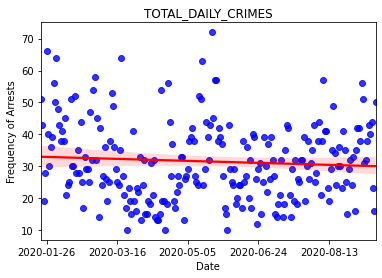

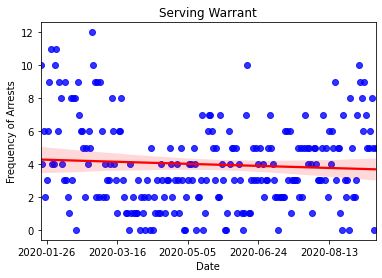

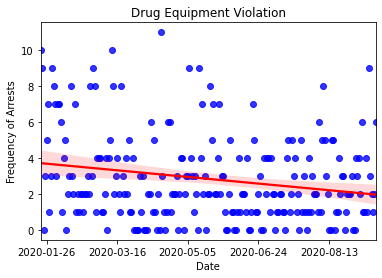

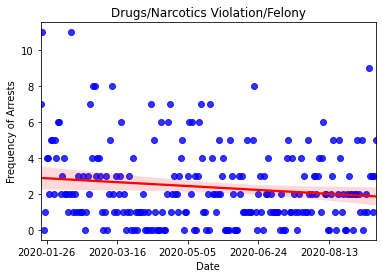

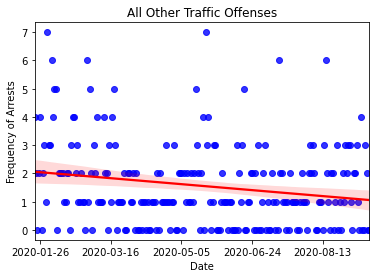

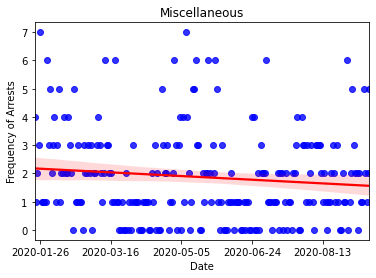

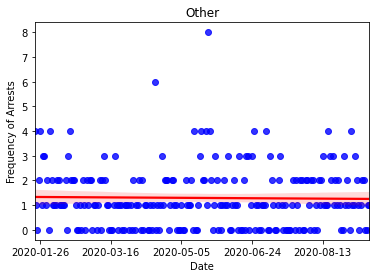

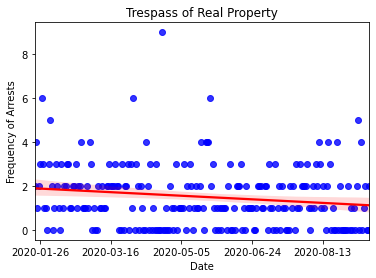

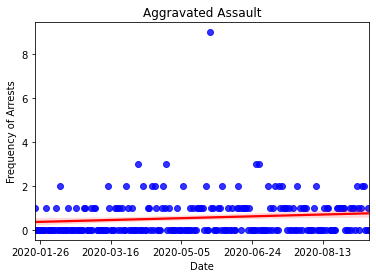

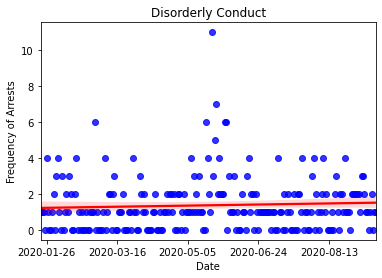

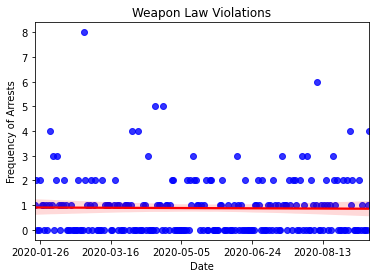

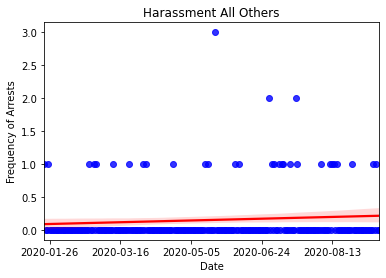

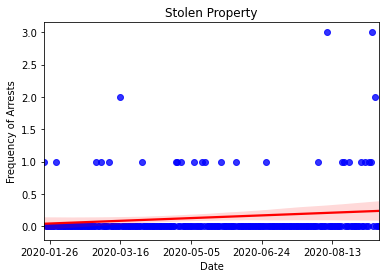

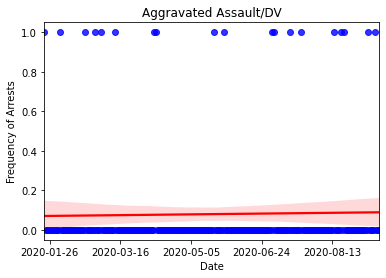

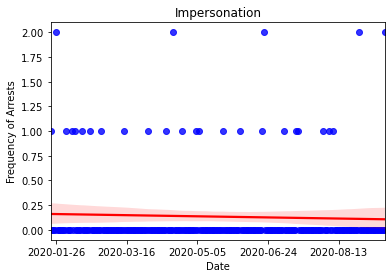

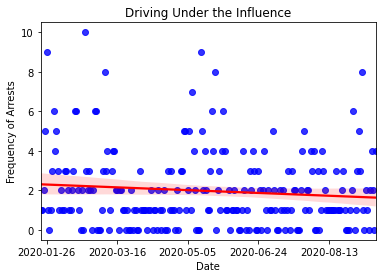

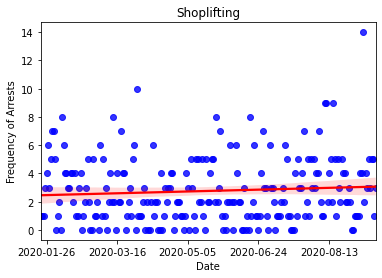

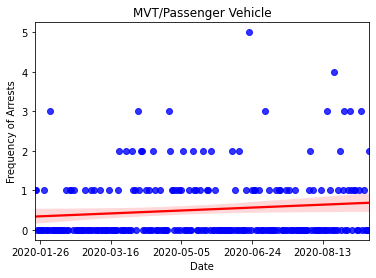

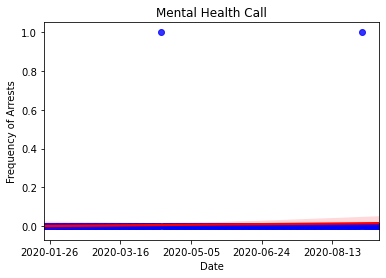

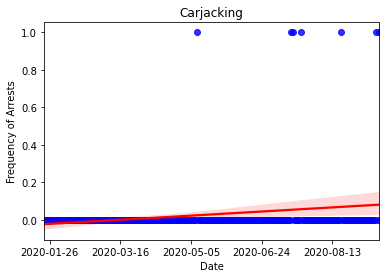

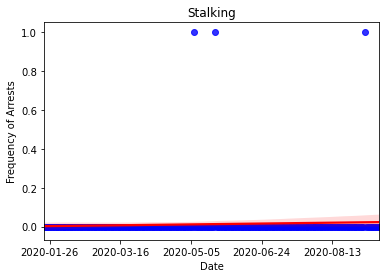

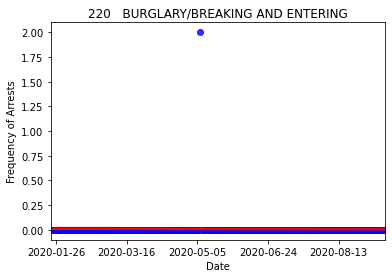

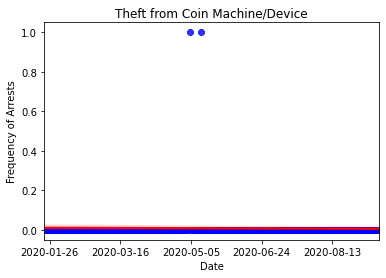

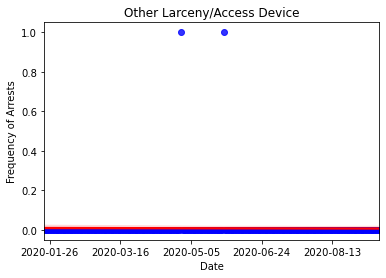

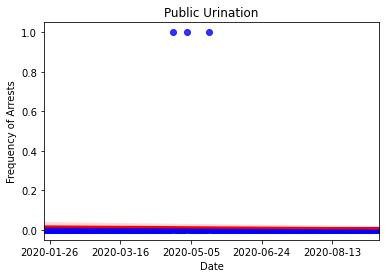

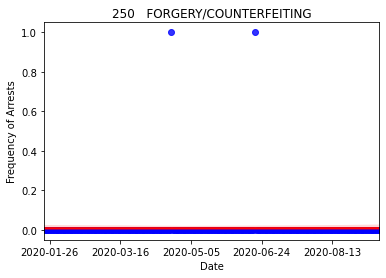

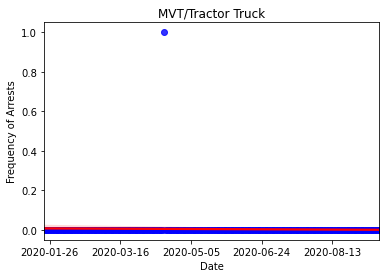

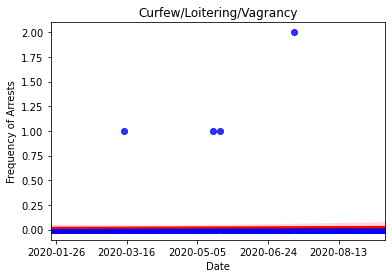

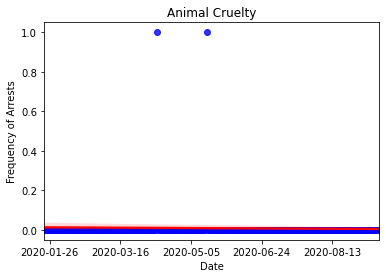

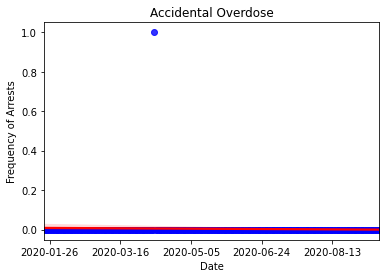

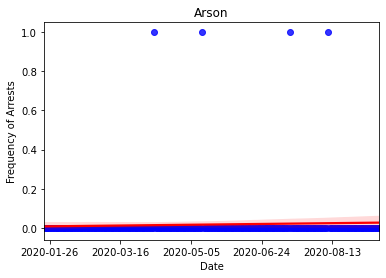

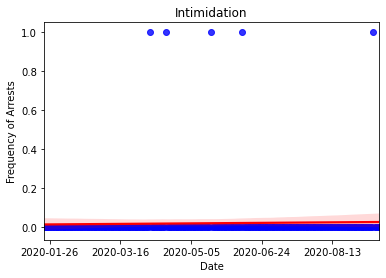

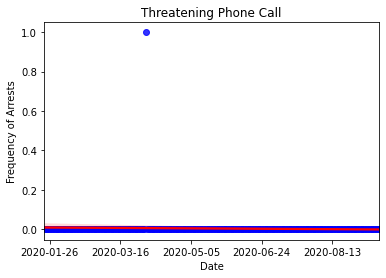

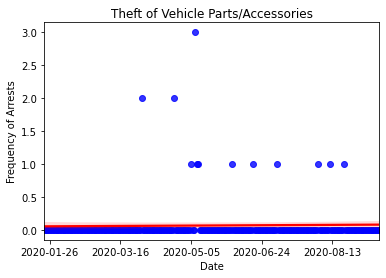

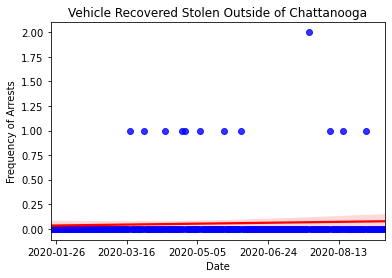

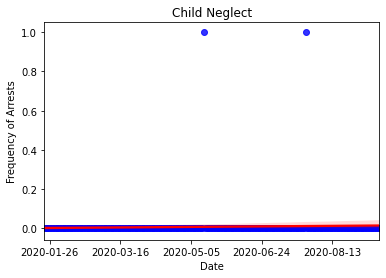

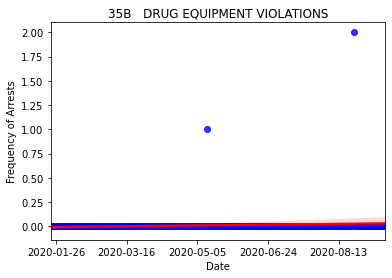

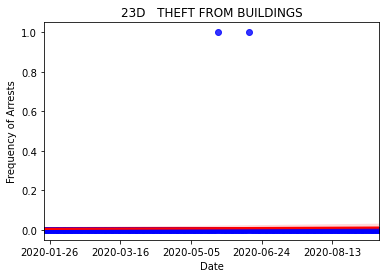

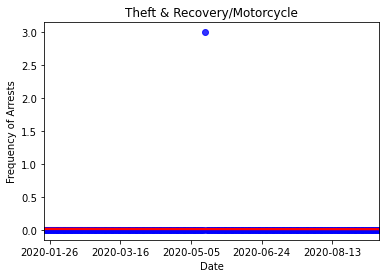

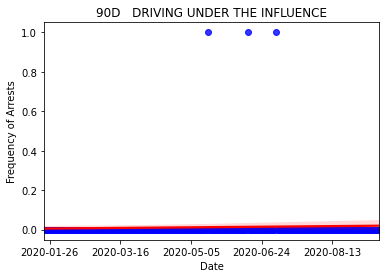

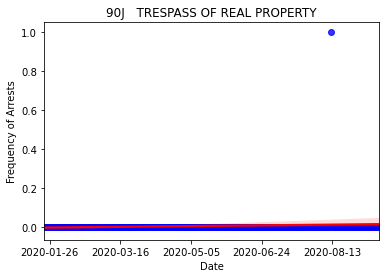

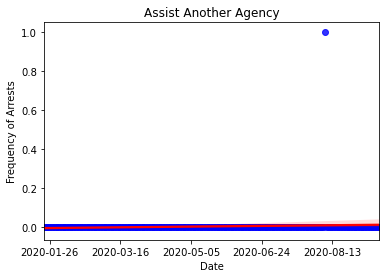

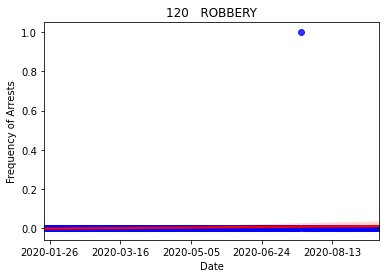

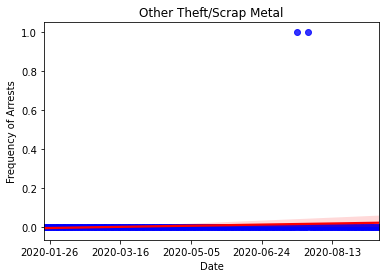

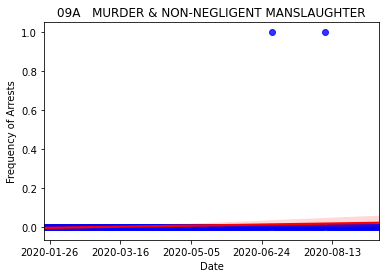

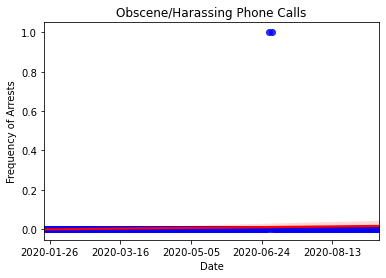

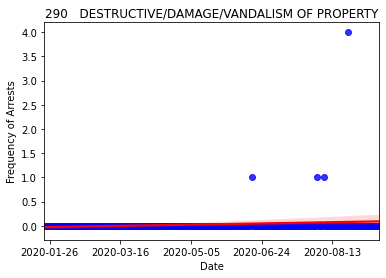

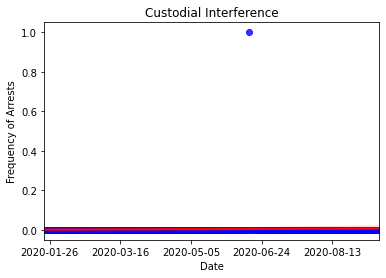

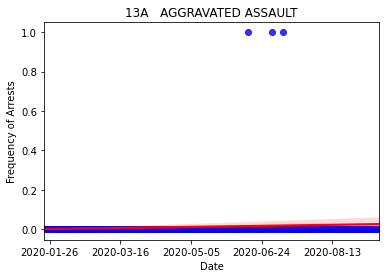

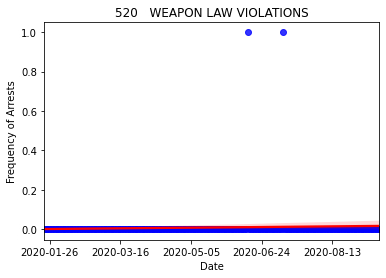

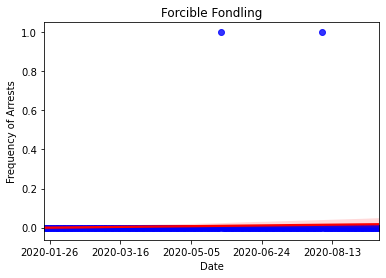

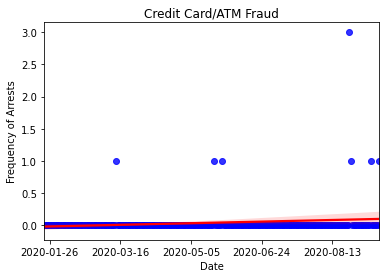

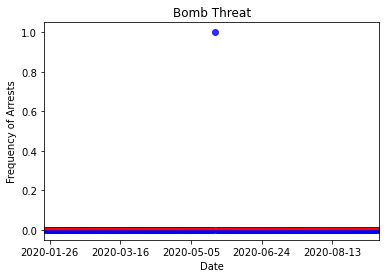

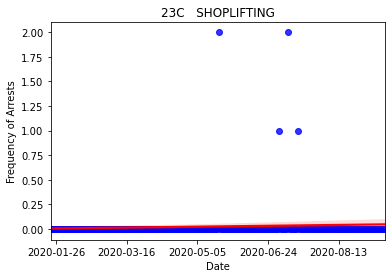

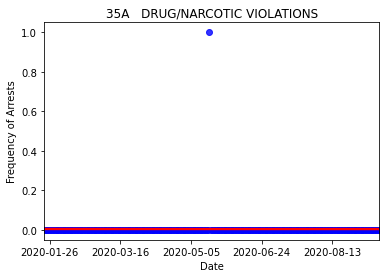

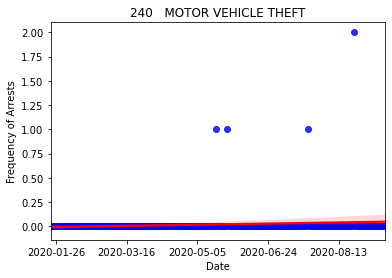

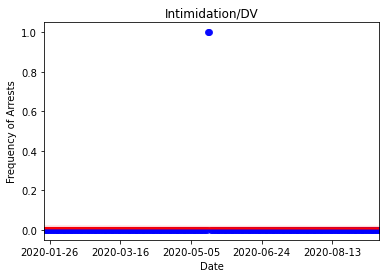

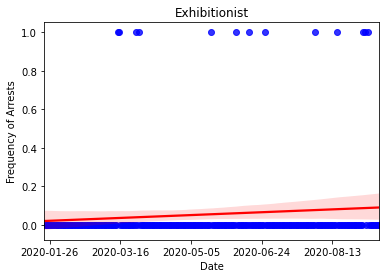

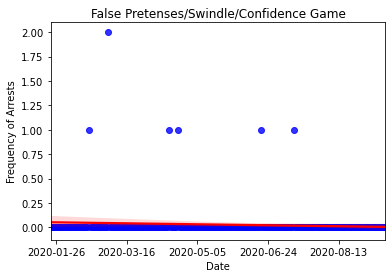

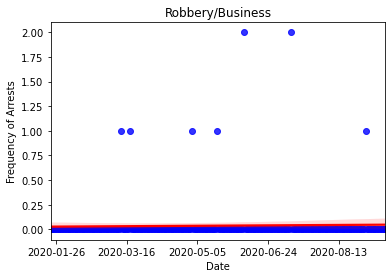

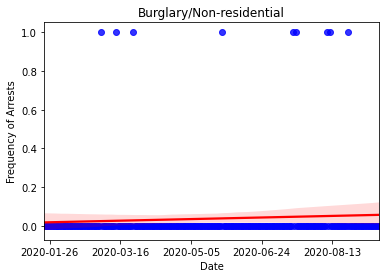

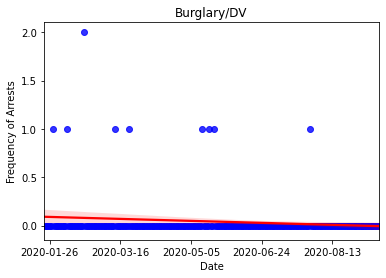

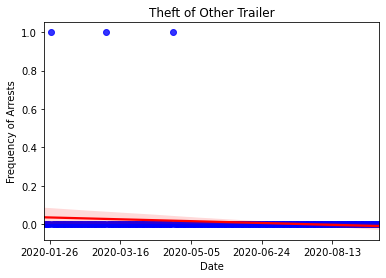

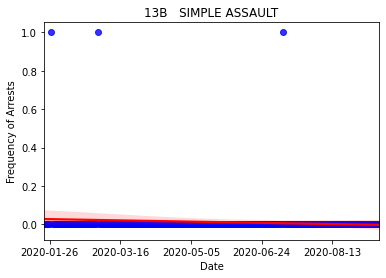

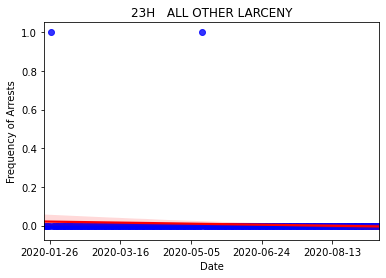

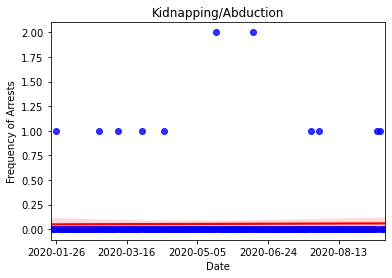

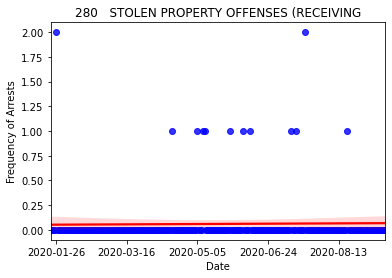

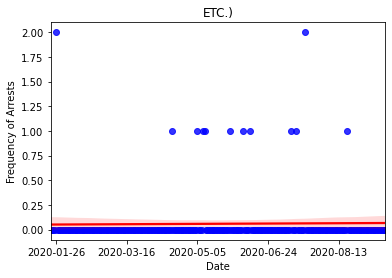

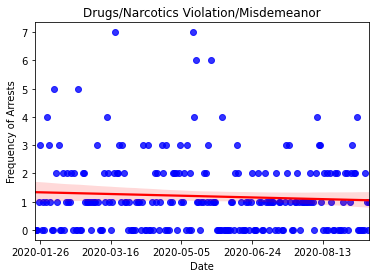

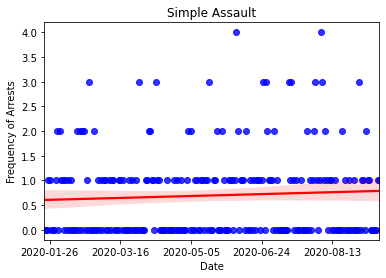

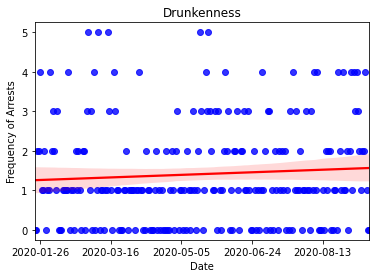

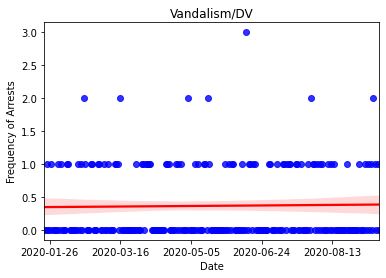

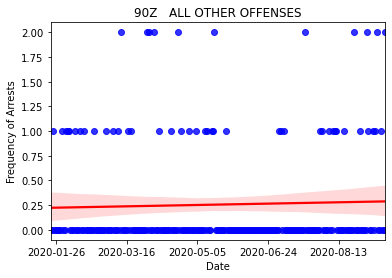

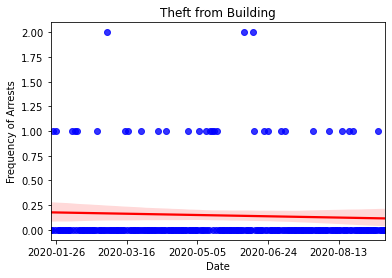

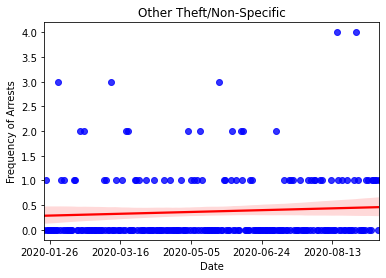

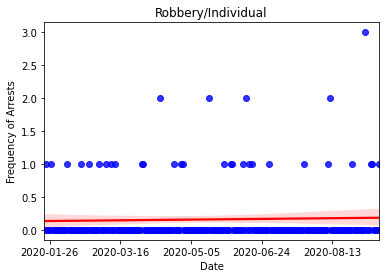

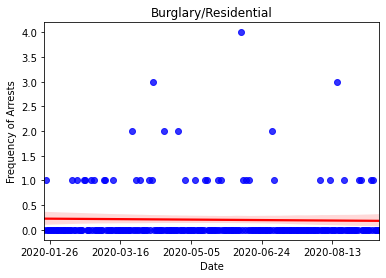

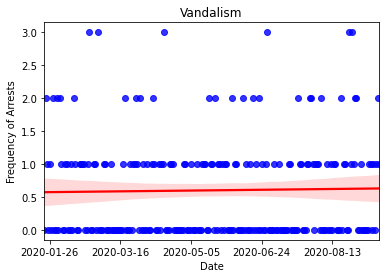

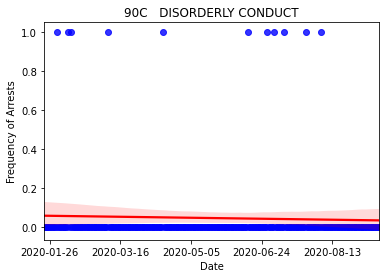

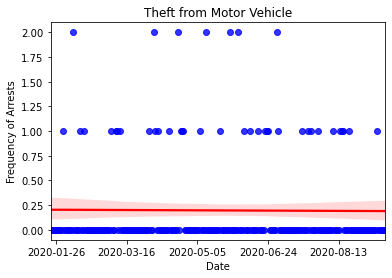

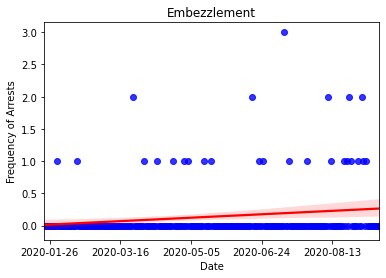

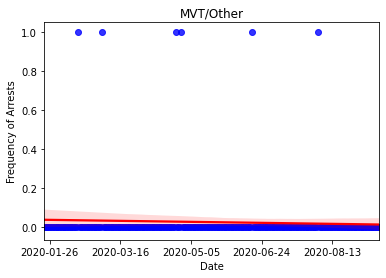

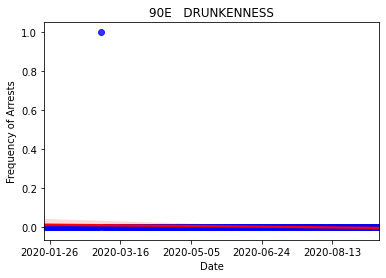

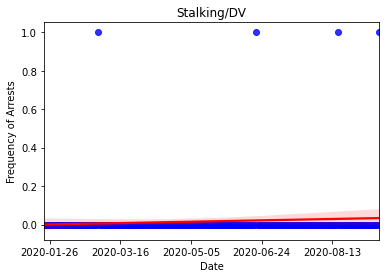

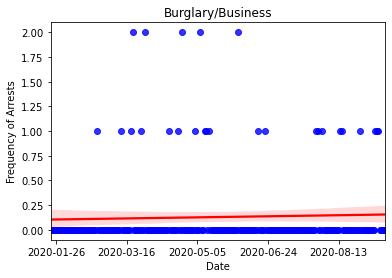

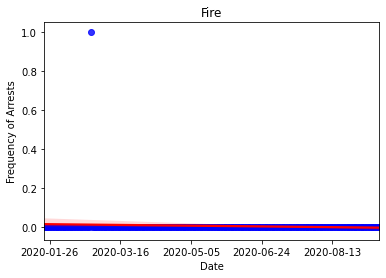

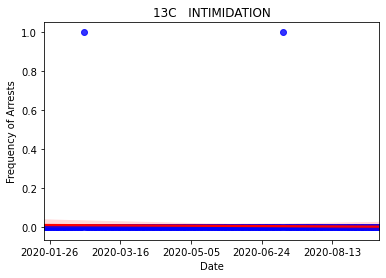

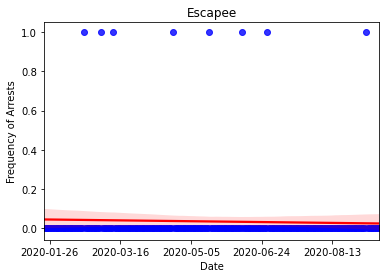

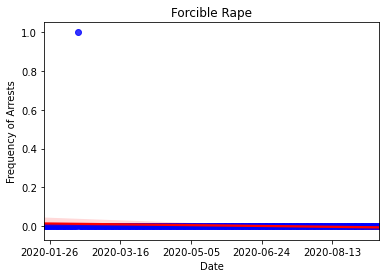

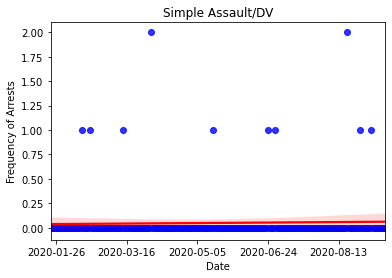

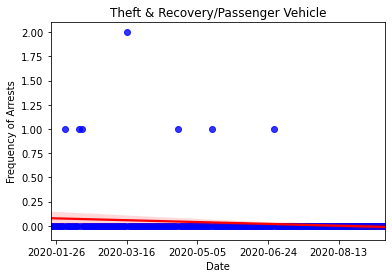

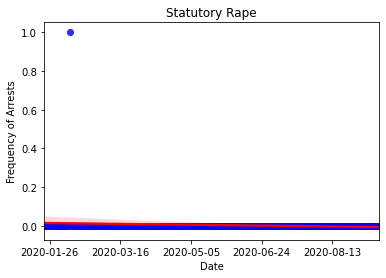

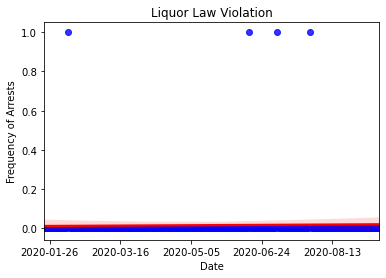

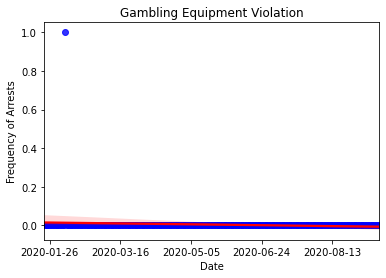

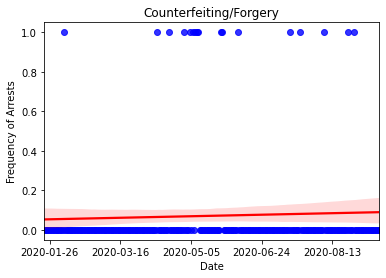

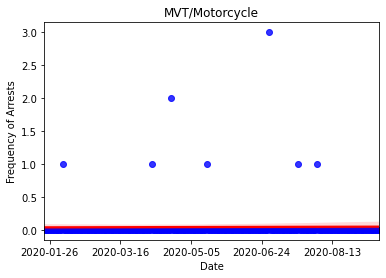

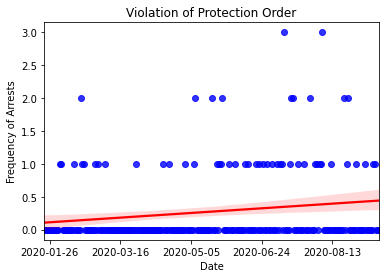

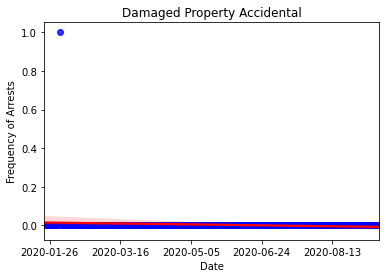

In [37]:
plt.rcParams.update({'figure.max_open_warning': 0})
cpy = t_cpd_df.copy(deep=True)
t = len(cpy.columns)
x = 'Date'
y = 'Frequency of Arrests'
cpy.index = cpy.index.map(datetime.date.toordinal)

for col in tqdm(cpy,total=t,desc='CPD Scatterplots with Trendlines',unit='figures'):
    plt.figure()
    s = sea.regplot(cpy.index,cpy[col],data=cpy,color='Red',scatter_kws={"color": "blue"})
    ax = plt.gca()
    xticks = ax.get_xticks()
    xticks_dates = [datetime.date.fromordinal(int(x)) for x in xticks]
    ax.set_xticklabels(xticks_dates)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(col)

# cpy.index = cpy.index.map(datetime.date.fromordinal)
plt.show()
plt.close('all') #close all figures to prevent memory leak

In [ ]:
plot_by_crime()

##### 4.3.3.2 Pre-Covid-19 period crime data

These trendlines are of the pre-covid CPD data. The timeframe is slightly longer than the data set during the covid-19 tracking period, so it gives a good historical record of crime trends over time in Chattanooga.

Generally speaking, there was a rapid rise in crime leading up to the emergence of covid-19. This can be seen in the TOTAL_DAILY_CRIMES plot. Many of the crimes seemed have occurred from Dec 2018 to Oct 2019, however, with a lull in crime after that which continued into the covid-19 season. This could not have corresponded with the announcement of covid-19, as that occurred in Dec 2019, nearly two months later. It also did not seem to have corresponded with any major changes or events in Chattanooga, aside from a citizen's oversight committee formed in May 2019 [4], but that was created to monitor police rather than criminals. There is the possibility that the institution of an oversight committee reigned back some overzealous policing practices though. There is also the chance that the onset of cold weather or the holiday seasons were to blame for reduced arrests, though considering that October through December is a big time for consumer spending, it seems unlikely that crime would have decreased so suddenly. The lull must be attributed, at the very least, to some change in the police force around that time.

It is also worth mentioning that even though arrests were happening on fewer days after Oct 2019, the days when they did occur tended to remain at about the average of previous arrest frequencies, if slightly lower compared to a peak around mid October 2019.

Additionally, compared to the arrest data taken during the covid pandemic, some crimes actually saw a decrease. Drunkenness, which is on the rise during covid-19, was actually going down beforehand. Predictably, traffic offenses were on the rise, as people were still driving during this period. Shoplifting was actually rising quicker before covid-19 than it is during the pandemic, which is a bit surprising considering that people might be more desperate during such an emergency. Other crimes saw changes as well between the two periods, but such is to expected and is a bit much to cover in text alone.

CPD Scatterplots with Trendlines: 100%|█████████████████████████████████████████| 112/112 [00:17<00:00,  6.30figures/s]


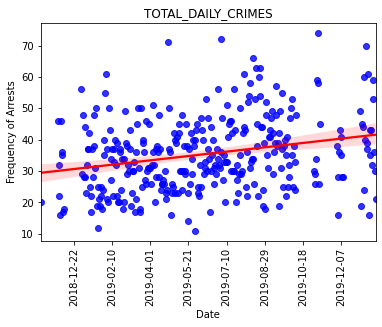

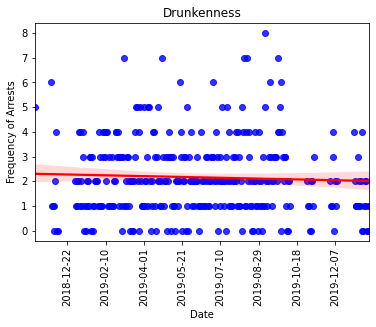

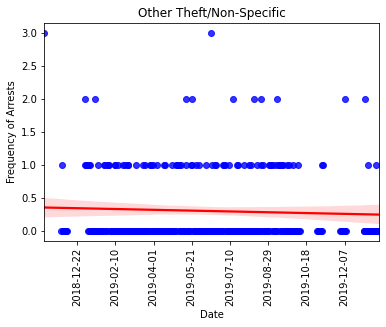

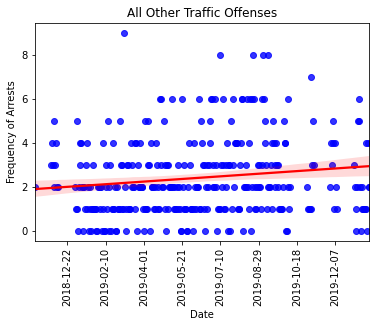

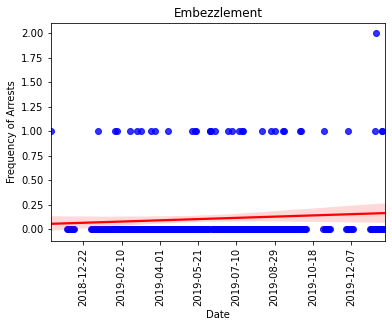

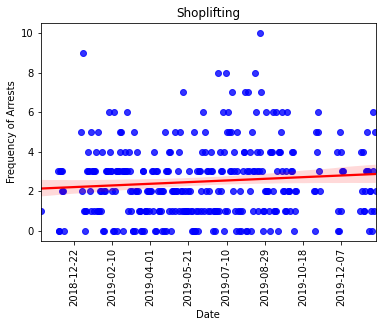

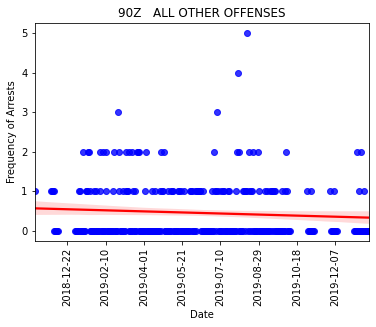

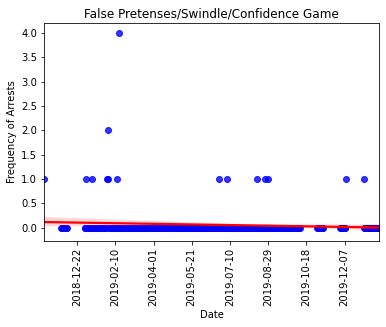

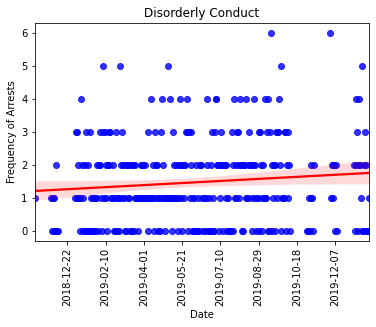

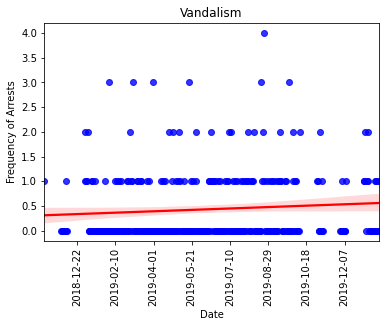

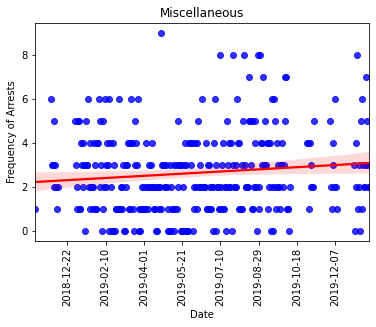

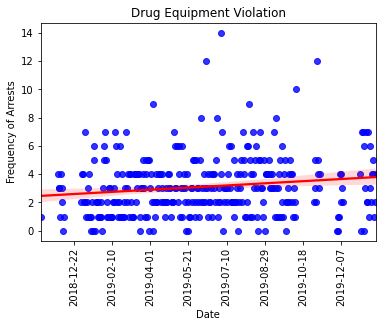

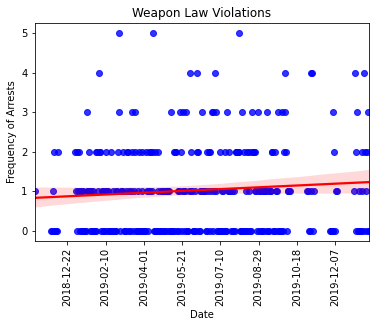

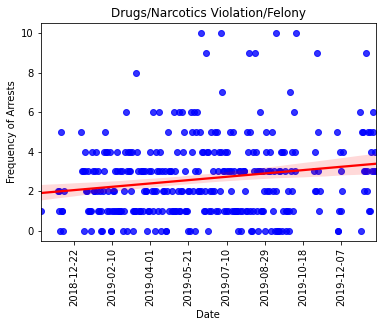

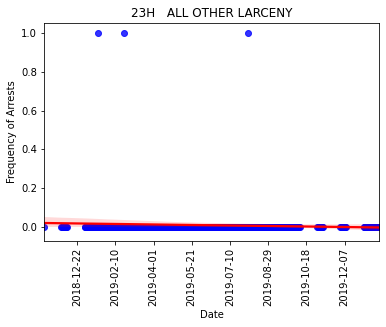

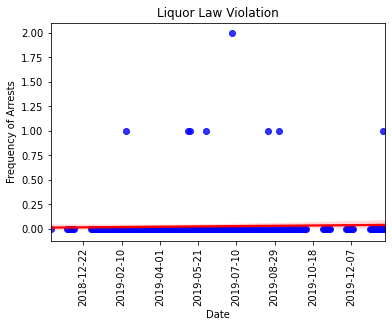

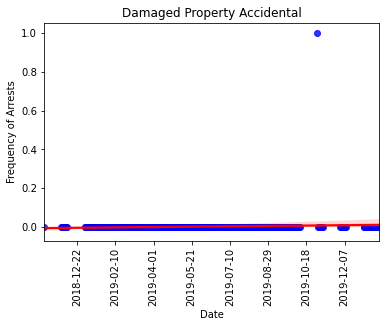

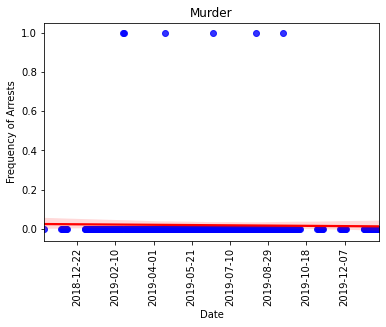

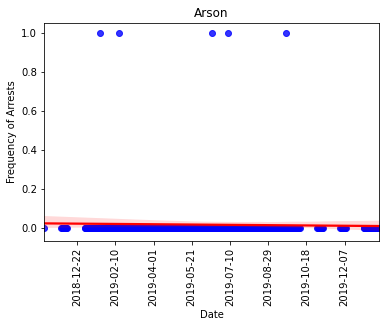

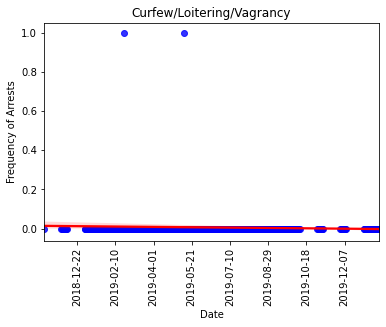

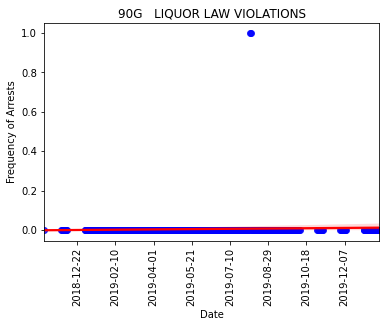

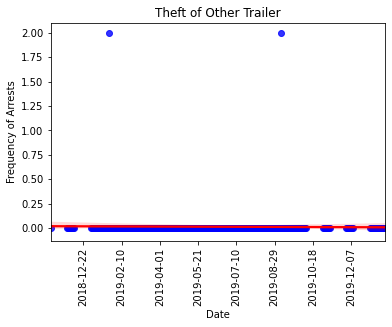

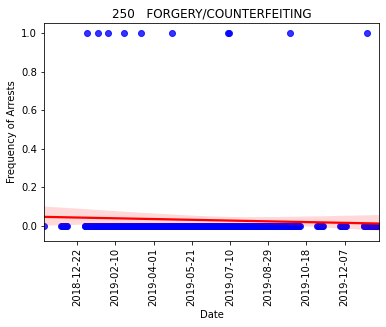

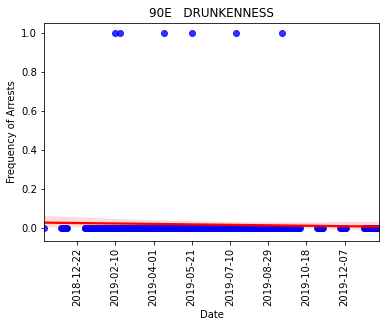

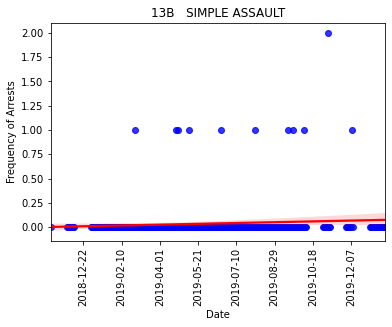

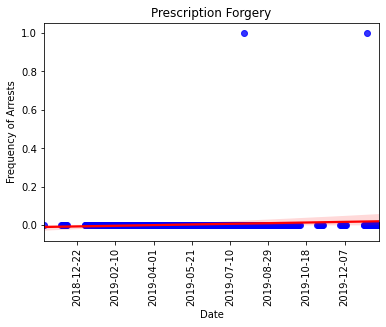

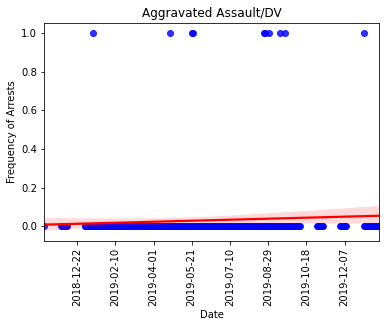

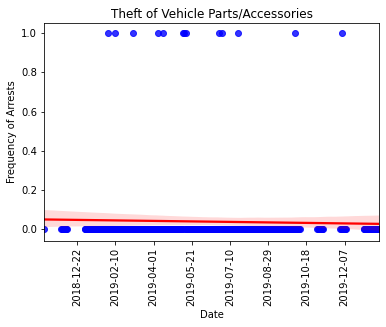

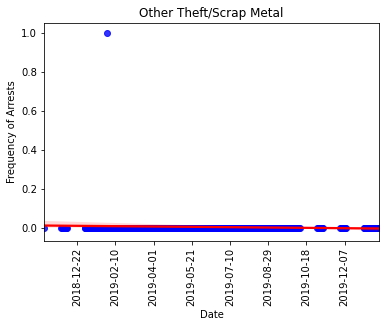

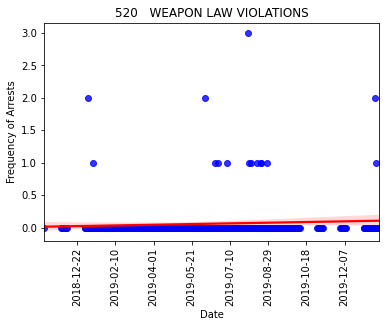

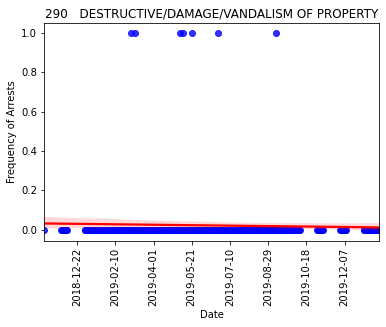

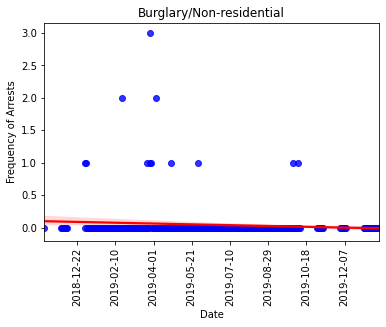

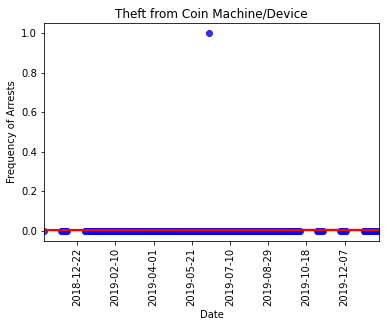

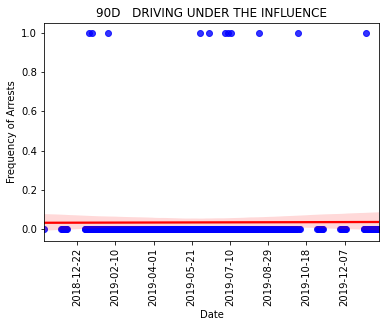

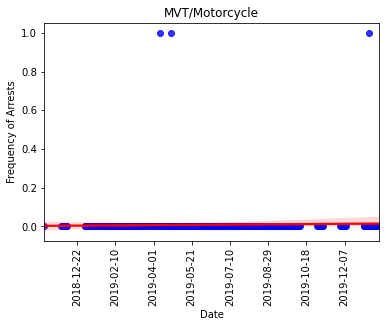

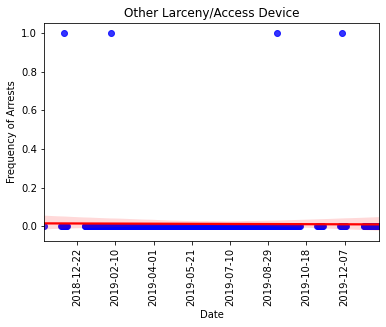

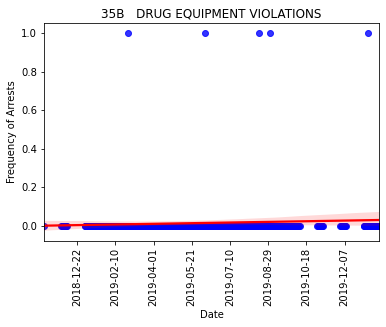

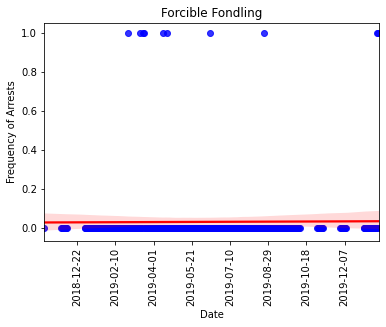

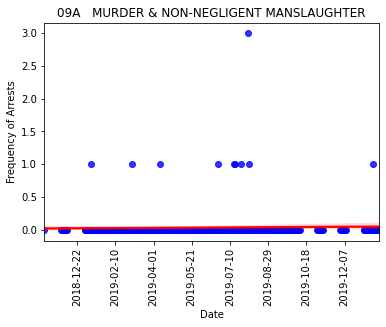

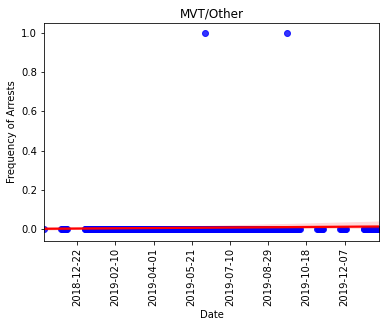

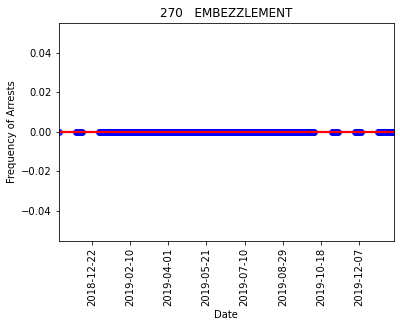

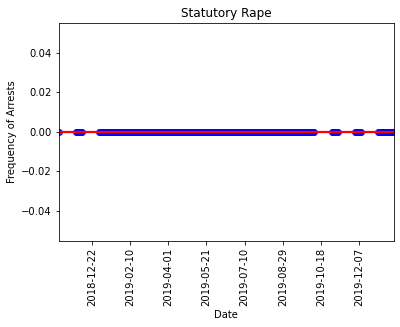

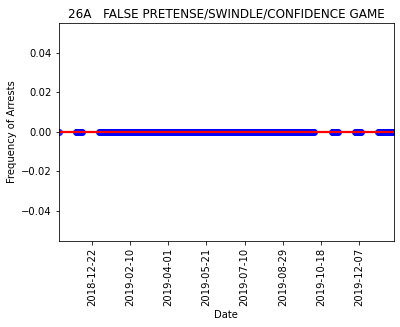

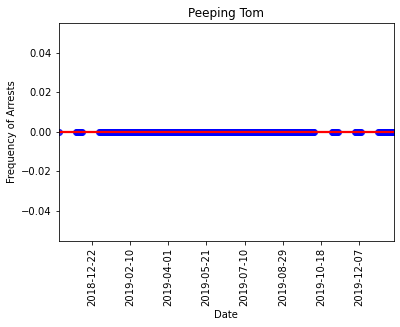

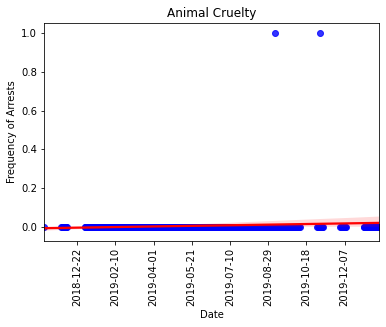

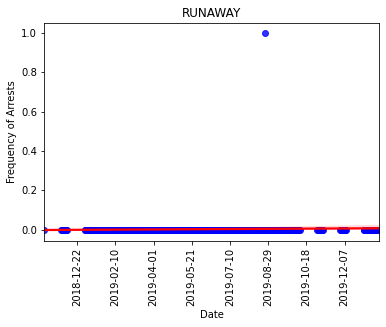

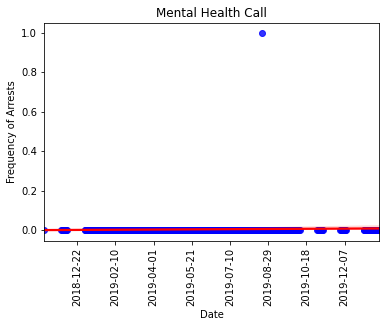

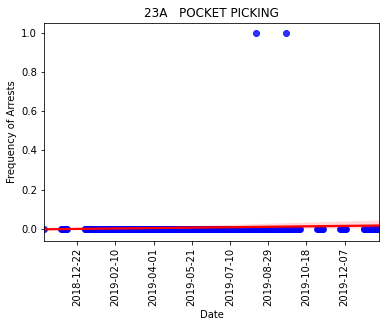

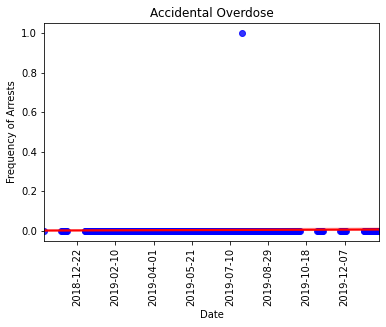

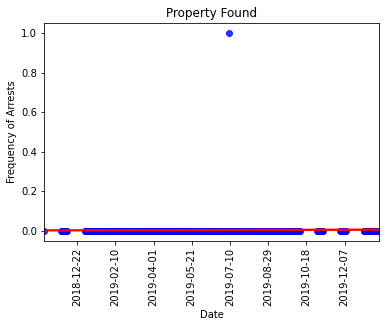

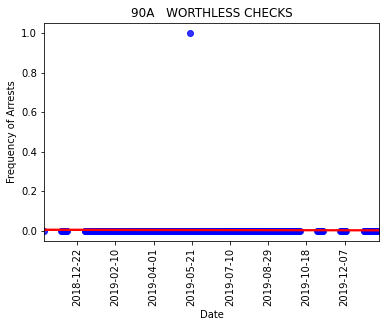

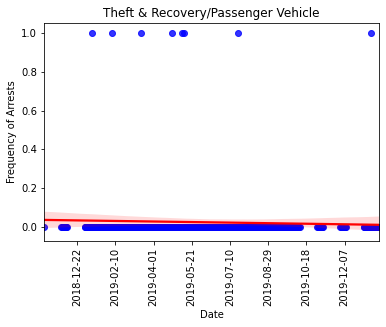

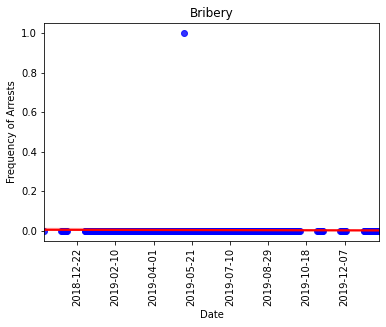

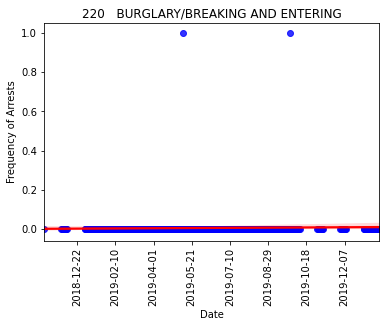

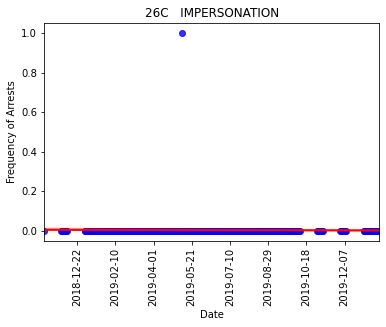

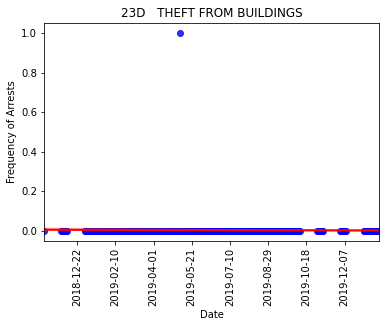

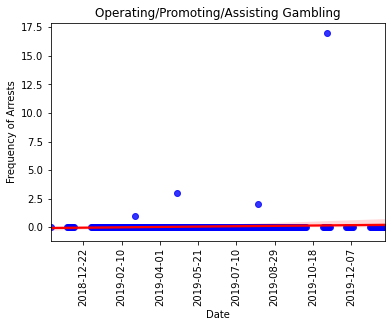

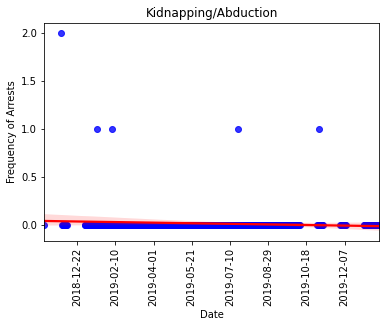

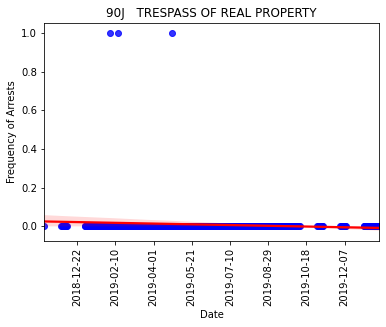

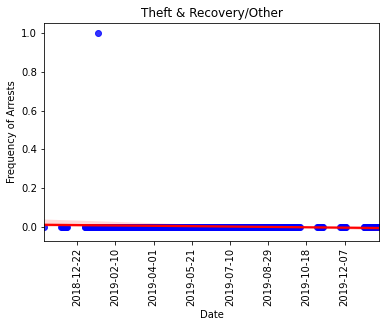

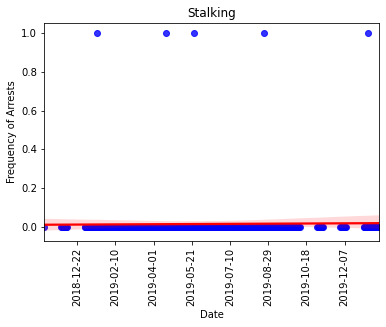

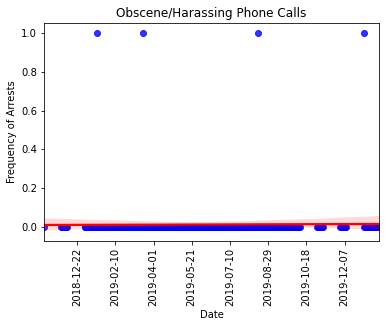

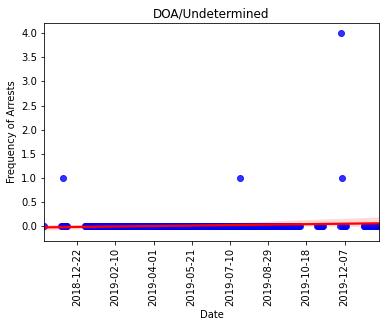

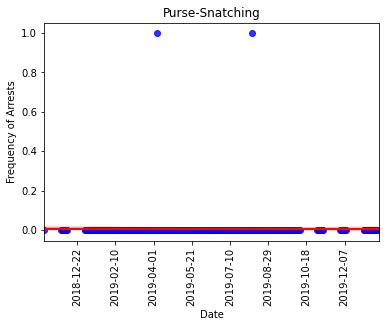

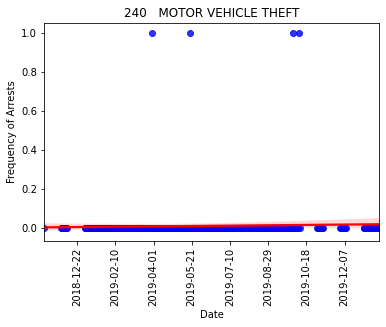

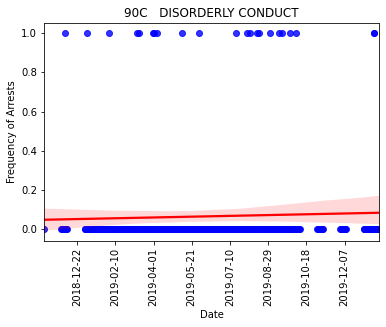

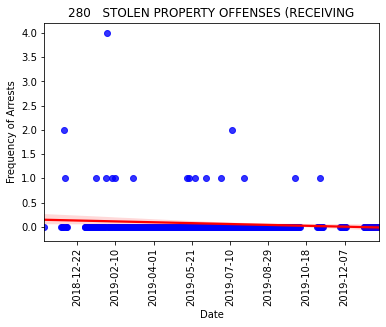

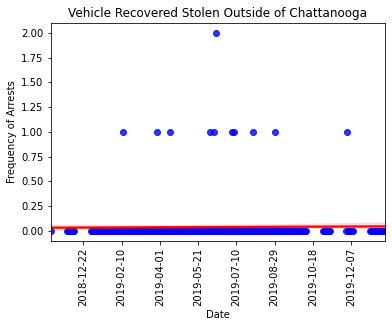

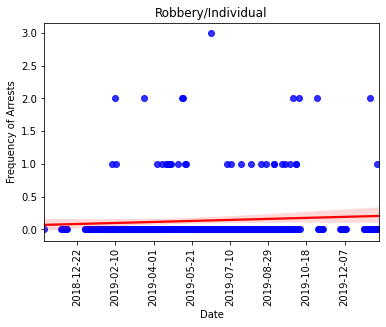

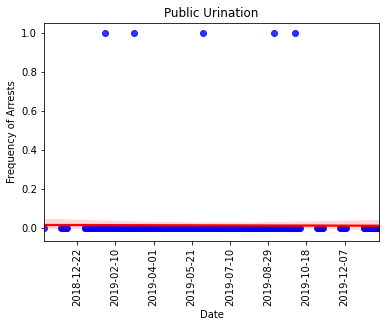

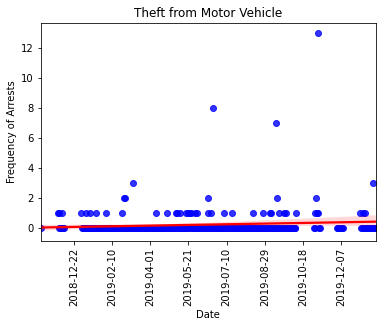

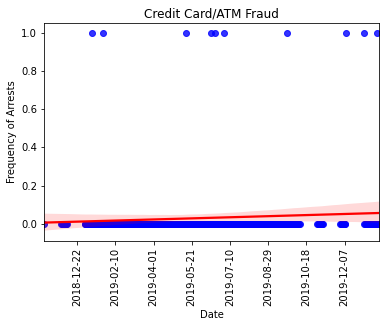

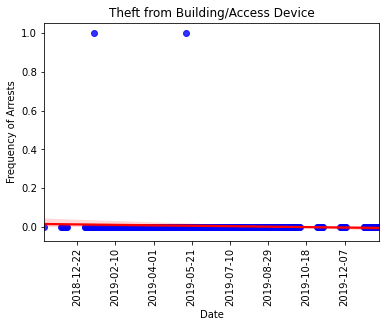

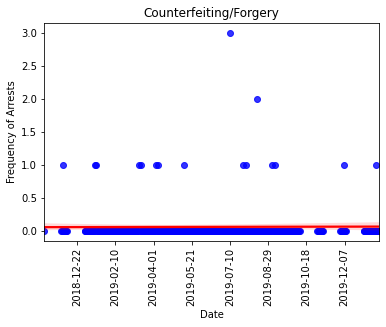

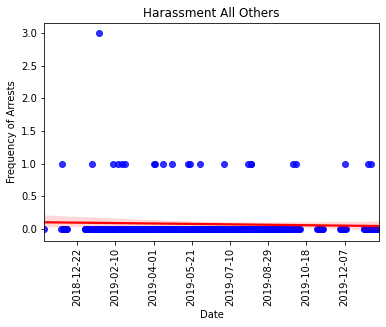

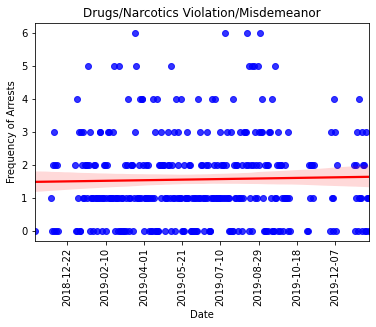

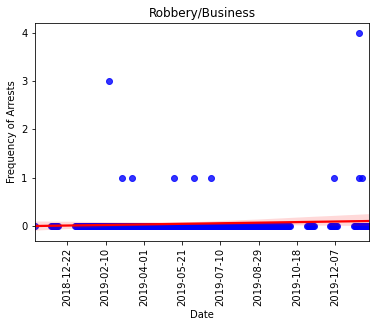

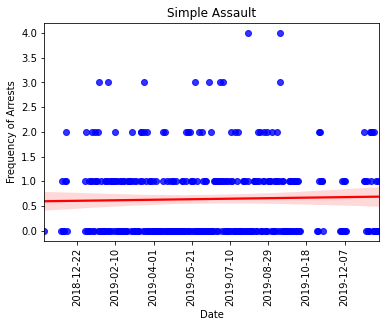

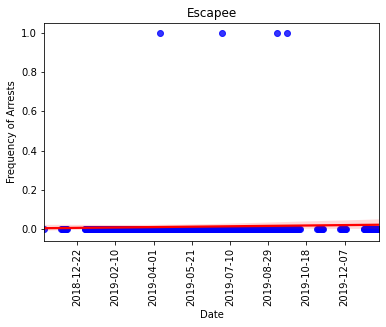

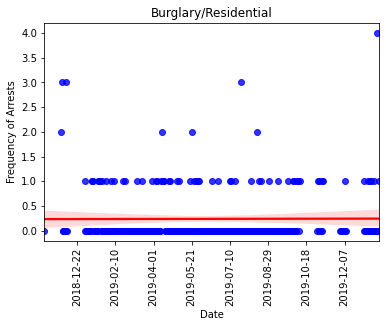

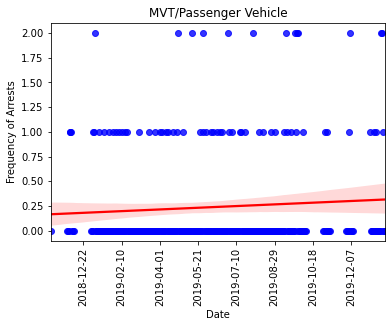

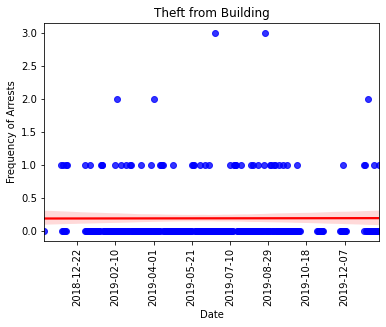

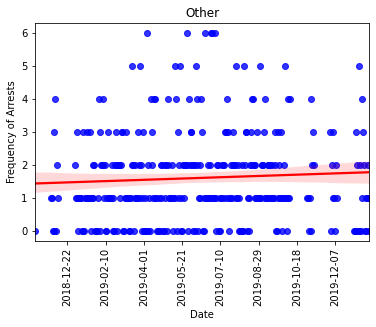

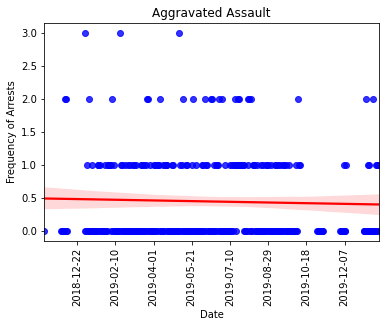

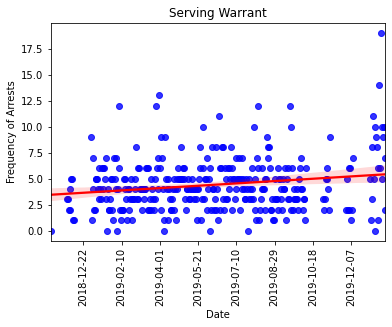

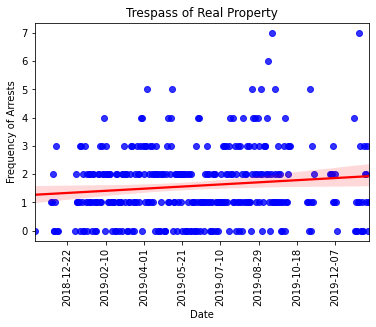

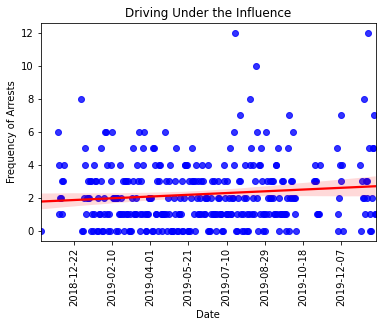

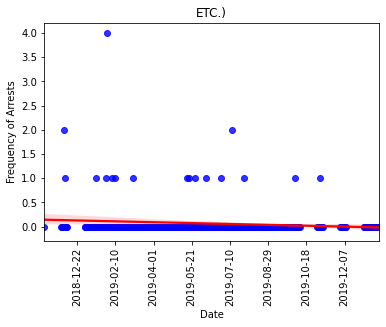

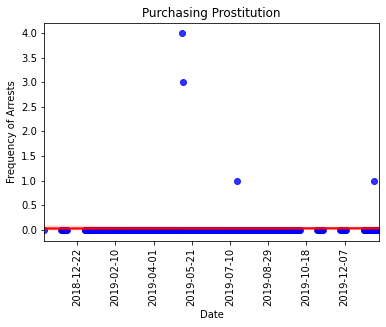

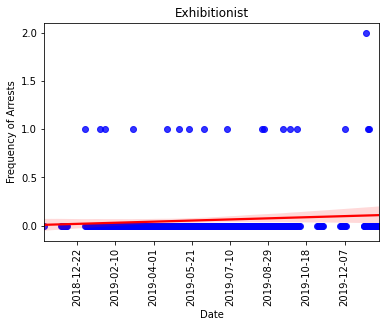

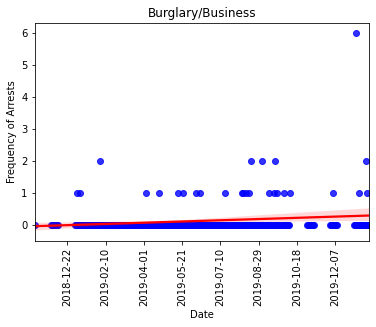

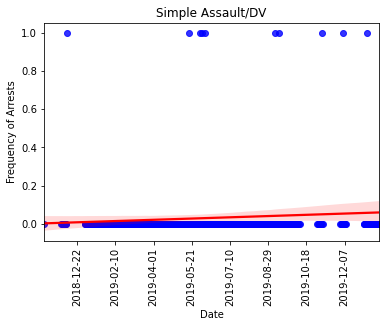

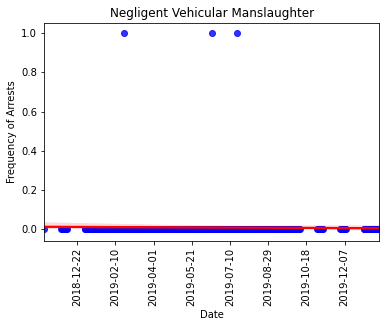

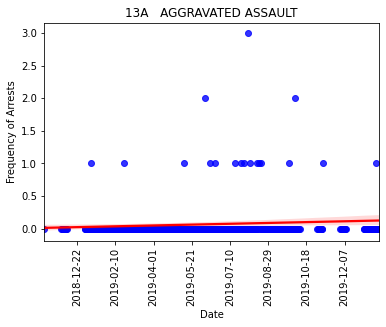

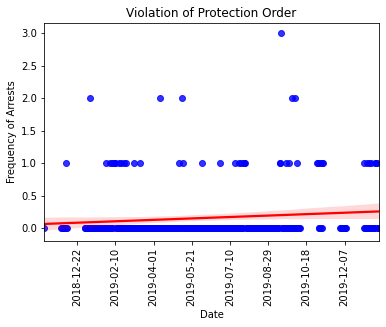

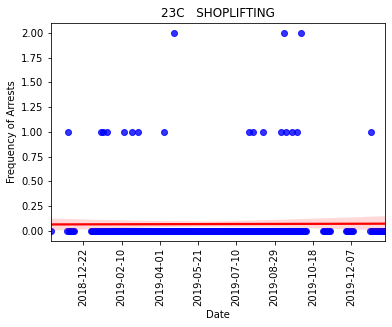

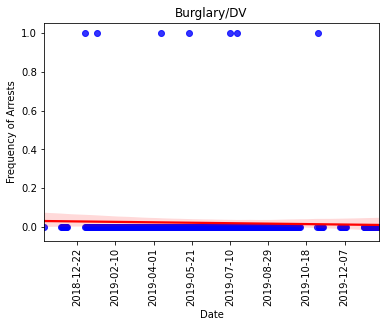

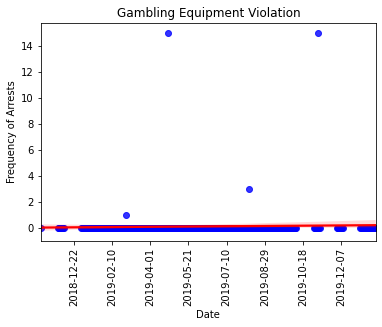

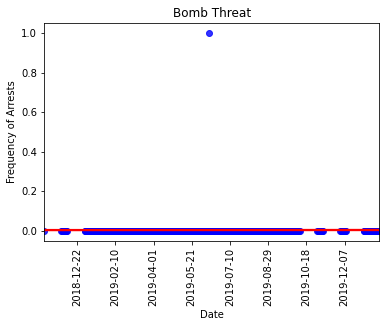

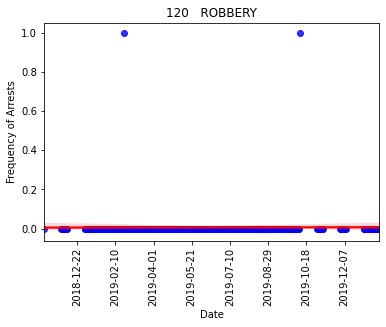

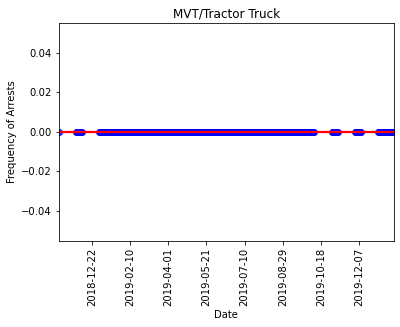

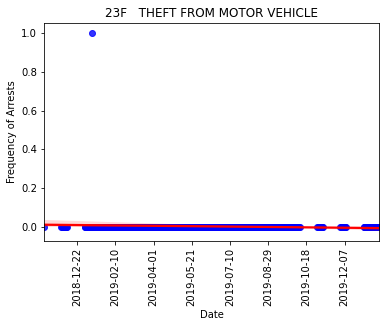

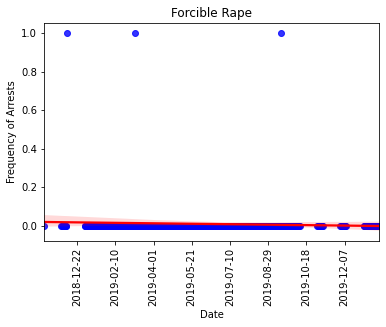

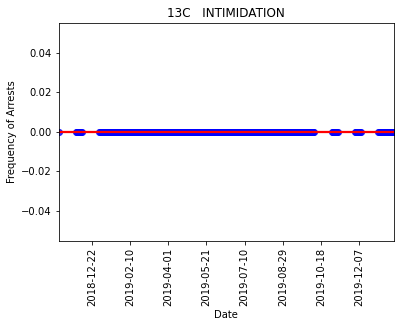

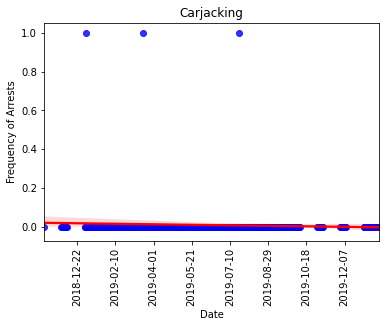

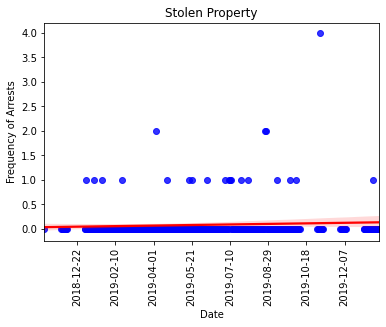

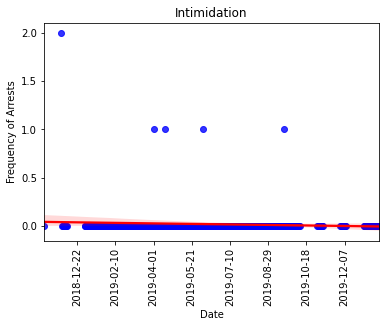

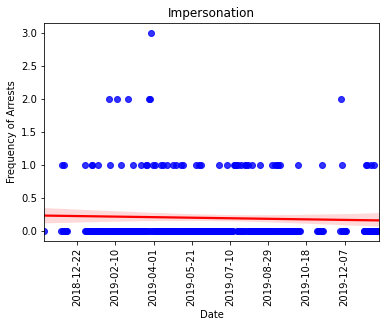

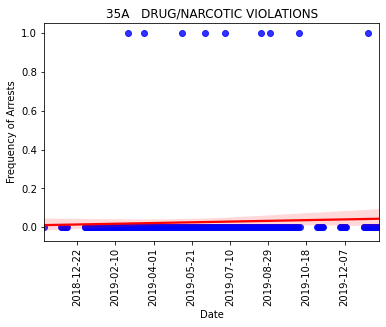

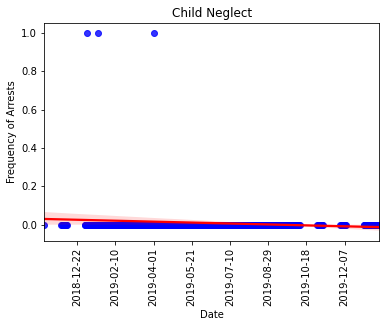

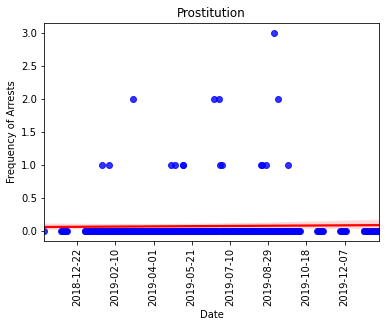

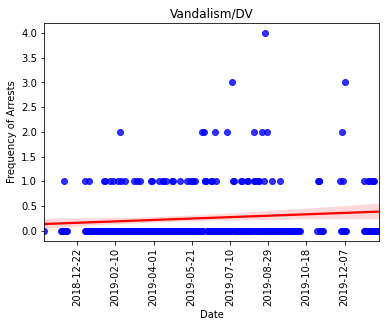

In [38]:
plt.rcParams.update({'figure.max_open_warning': 0})
cpy = past_cpd_df.copy(deep=True)
t = len(cpy.columns)
x = 'Date'
y = 'Frequency of Arrests'
cpy.index = cpy.index.map(datetime.date.toordinal)

for col in tqdm(cpy,total=t,desc='CPD Scatterplots with Trendlines',unit='figures'):
    plt.figure()
    s = sea.regplot(cpy.index,cpy[col],data=cpy,color='Red',scatter_kws={"color": "blue"})
    ax = plt.gca()
    xticks = ax.get_xticks()
    xticks_dates = [datetime.date.fromordinal(int(x)) for x in xticks]
    ax.set_xticklabels(xticks_dates,rotation=90)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(col)

# cpy.index = cpy.index.map(datetime.date.fromordinal)
plt.show()
plt.close('all') #close all figures to prevent memory leak

In [ ]:
plot_by_crime()

##### 4.3.3.3 Intersecting crimes: Pre-covid & post-covid

This section will attempt to show only the crimes that both the pre and post-covid dataframes share in common. It will display their trendlines alongside each other for easy comparison of how they have changed. Note that the pre-covid dataframe has a moderately longer time frame than the post-covid dataframe. This is due to issues with the cleanliness of the data. However, even with different lengths of time, the pre-covid data still fulfills its purpose of showing how crime was evolving in Chattanooga prior to the pandemic.

Now with the data side-by-side, if a bit compressed, the difference in the trends as a result of the onset of covid-19 can be seen more clearly. The information presented here is the same as the previous two visualization blocks, but here it is more readily apparent what effect the pandemic has had on arrests in Chattanooga.

In [ ]:
shared = set(t_cpd_df.columns).intersection(past_cpd_df.columns)
# shared
plt.rcParams.update({'figure.max_open_warning': 0})
cpypast = past_cpd_df.copy(deep=True)
cpycurrent = t_cpd_df.copy(deep=True)
t = len(shared)
x = 'Date'
y = 'Frequency of Arrests'
cpypast.index = cpypast.index.map(datetime.date.toordinal)
cpycurrent.index = cpycurrent.index.map(datetime.date.toordinal)

for col in tqdm(shared,total=t,desc='CPD Scatterplots with Trendlines',unit='figures'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    sea.regplot(cpypast.index,cpypast[col],ax=ax1,color='Red',scatter_kws={"color": "blue"})
    sea.regplot(cpycurrent.index,cpycurrent[col],ax=ax2,color='Red',scatter_kws={"color": "blue"})
    xticks = ax1.get_xticks()
    xticks_dates = [datetime.date.fromordinal(int(x)) for x in xticks]
    ax1.set_xticklabels(xticks_dates,rotation=90)
    
    xticks = ax2.get_xticks()
    xticks_dates = [datetime.date.fromordinal(int(x)) for x in xticks]
    ax2.set_xticklabels(xticks_dates,rotation=90)
    ax1.set_title('Pre-Covid Daily Arrests')
    ax2.set_title('Post-Covid Daily Arrests')

plt.show()
plt.close('all') #close all figures to prevent memory leak

##### 4.3.3.4 Intersecting crimes: Plot by crime

This section contains a function used in the Discussion section. You may also make use of the function in the code block below it.

In [ ]:
def plot_by_crime():
    shared = set(t_cpd_df.columns).intersection(past_cpd_df.columns)
    hlp = 'Enter the name of the crime you wish to plot. Only intersecting crimes from both datasets are provided. For a list of crimes to search, enter /c. Partial search term matching is in effect.'
    cpypast = past_cpd_df.copy(deep=True)
    cpycurrent = t_cpd_df.copy(deep=True)
    x = 'Date'
    y = 'Frequency of Arrests'
    cpypast.index = cpypast.index.map(datetime.date.toordinal)
    cpycurrent.index = cpycurrent.index.map(datetime.date.toordinal)

    print(hlp)
    choice = input('Search for: ')
    if choice == '/c':
        display(shared)
    else:
        matches = []
        for crime in shared:
            if choice.lower() in crime.lower():
                matches.append(crime)
        if not matches:
            print('No results')
        else:
            for col in matches:
                fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
                sea.regplot(cpypast.index,cpypast[col],ax=ax1,color='Red',scatter_kws={"color": "blue"})
                sea.regplot(cpycurrent.index,cpycurrent[col],ax=ax2,color='Red',scatter_kws={"color": "blue"})
                xticks = ax1.get_xticks()
                xticks_dates = [datetime.date.fromordinal(int(x)) for x in xticks]
                ax1.set_xticklabels(xticks_dates,rotation=90)

                xticks = ax2.get_xticks()
                xticks_dates = [datetime.date.fromordinal(int(x)) for x in xticks]
                ax2.set_xticklabels(xticks_dates,rotation=90)
                ax1.set_title('Pre-Covid Daily Arrests')
                ax2.set_title('Post-Covid Daily Arrests')

                plt.show()
                plt.close('all') #close all figures to prevent memory leak

In [ ]:
plot_by_crime()

##### 4.3.3.5 Non-intersecting crimes: Pre-covid & post-covid

This code is not a visualization, but it will print the crimes that are unique to the pre-covid and post-covid time periods. These are crimes that are almost universally very uncommon, having no more than a few dozen occurrances over a long period of time. Additionally, these are crimes that would technically answer some of the research questions regarding crimes that appear before and after covid, but because they are so uncommon as to be outliers, they will not be significantly brought up again in discussion. The following code section will use the lists created here to allow statistical exploration of these uncommon crimes.

In [39]:
diff_precovid = [crime for crime in past_cpd_df.columns if crime not in t_cpd_df.columns]
diff_postcovid = [crime for crime in t_cpd_df.columns if crime not in past_cpd_df.columns]
print('Crimes unique to the PRE-COVID time period:')
display(diff_precovid)
print('Crimes unique to the POST-COVID time period:')
display(diff_postcovid)

Crimes unique to the PRE-COVID time period:


['Murder',
 '90G   LIQUOR LAW VIOLATIONS',
 'Prescription Forgery',
 '270   EMBEZZLEMENT',
 '26A   FALSE PRETENSE/SWINDLE/CONFIDENCE GAME',
 'Peeping Tom',
 'RUNAWAY',
 '23A   POCKET PICKING',
 'Property Found',
 '90A   WORTHLESS CHECKS',
 'Bribery',
 '26C   IMPERSONATION',
 'Operating/Promoting/Assisting Gambling',
 'Theft & Recovery/Other',
 'DOA/Undetermined',
 'Purse-Snatching',
 'Theft from Building/Access Device',
 'Purchasing Prostitution',
 'Negligent Vehicular Manslaughter',
 '23F   THEFT FROM MOTOR VEHICLE',
 'Prostitution']

Crimes unique to the POST-COVID time period:


['Threatening Phone Call',
 'Theft & Recovery/Motorcycle',
 'Assist Another Agency',
 'Custodial Interference',
 'Intimidation/DV',
 'Stalking/DV',
 'Fire']

You may also look up the statistics for each of these crimes using the code below.

In [ ]:
cpypast = past_cpd_df.copy(deep=True)
cpycurrent = t_cpd_df.copy(deep=True)
cpypast.replace(0,np.nan,inplace=True)
cpycurrent.replace(0,np.nan,inplace=True)
term = input('Search for: ')

if term in diff_precovid:
    display(cpypast[term].describe())
else:
    display(cpycurrent[term].describe())

### 4.4 Prepare and plot Covid-19 data

Now we move on to the Covid-19 data. This dataset is considerably less complex than the arrests data, so there is not much to be done for exploring it. A plot to visualize the change in daily cases should be sufficient for how this data will be used.

<Figure size 432x288 with 0 Axes>

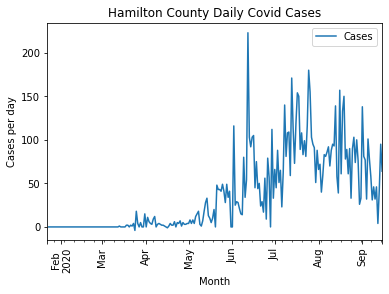

In [40]:
cov_df = r_cov_df.loc[:,'1/22/2020':]
t_cov_df = cov_df.transpose()
t_cov_df.rename(columns={t_cov_df.columns[0]:'Cases'}, inplace=True)
t_cov_df = t_cov_df.diff(axis=0)

t_cov_df.reset_index(inplace=True)
t_cov_df['index'] = pd.to_datetime(t_cov_df['index'])
t_cov_df.rename(columns={'index':'Date'},inplace=True)
t_cov_df.set_index('Date',inplace=True)
# t_cov_df.index = t_cov_df.index.map(datetime.date.toordinal)
# t_cov_df.index = t_cov_df.index.map(datetime.date.fromordinal)
# t_cov_df.replace(np.nan,0,inplace=True)
# t_cov_df.interpolate(method='spline',order=5,inplace=True)

plt.figure()
t_cov_df.plot(rot=90)
plt.xlabel('Month')
plt.ylabel('Cases per day')
plt.title('Hamilton County Daily Covid Cases')
plt.show()

As was expected, cases have risen considerably since they first began appearing, though there were some lulls in the cases around the start of August. It is unclear why the cases dipped so suddenly around that point, but it is clear from news releases in August that new cases were hitting a ceiling of sorts and slowly dropping, even while deaths seemed to be on the rise. [3]

In [ ]:
t_cov_df

### 4.5 Overlays & dataset combination

#### 4.5.1 Overlay frequency in CPD and daily cases in Covid

This overlay uses both the CPD arrests data and the covid data as line plots to show their change relative to each other. It is not quite as easy to read as a linear regression plot, but it shows change relative to each other at specific points in time. Various interpolation methods were attempted to smooth out the lines, but none have worked thus far.

In [ ]:
t_cpd_df

In [ ]:
t_cov_df

CPD/Covid Overlay Plots: 100%|████████████████████████████████████████████████████| 98/98 [00:10<00:00,  9.45figures/s]


<Figure size 432x288 with 0 Axes>

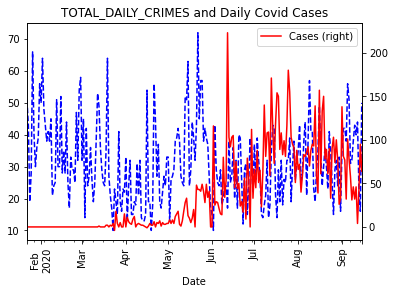

<Figure size 432x288 with 0 Axes>

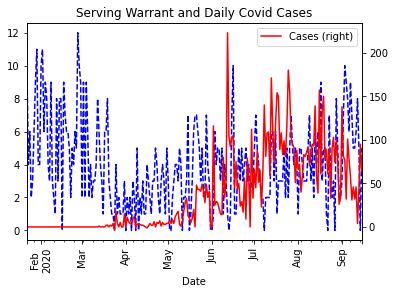

<Figure size 432x288 with 0 Axes>

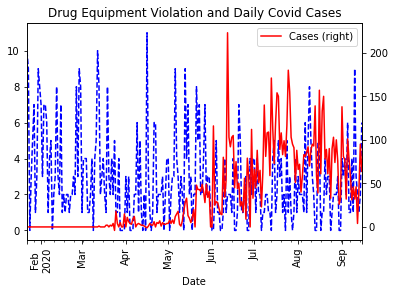

<Figure size 432x288 with 0 Axes>

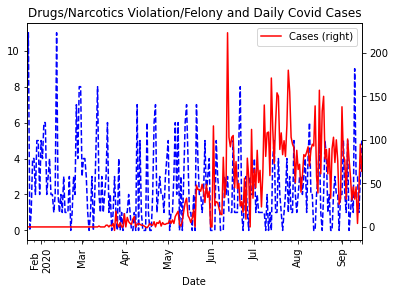

<Figure size 432x288 with 0 Axes>

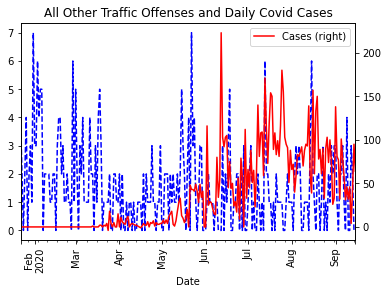

<Figure size 432x288 with 0 Axes>

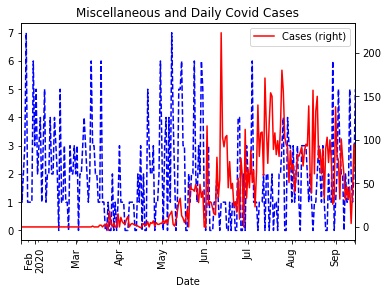

<Figure size 432x288 with 0 Axes>

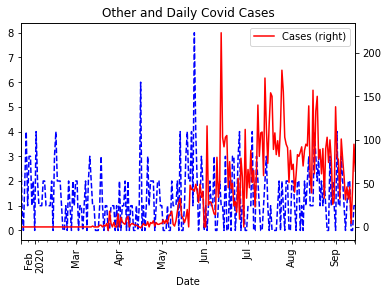

<Figure size 432x288 with 0 Axes>

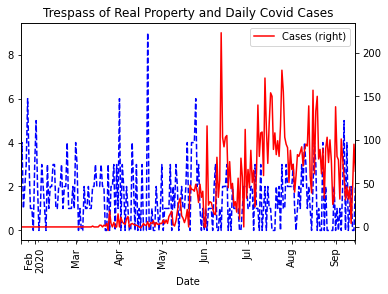

<Figure size 432x288 with 0 Axes>

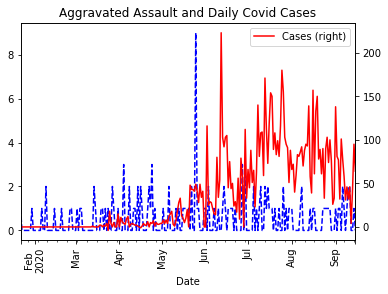

<Figure size 432x288 with 0 Axes>

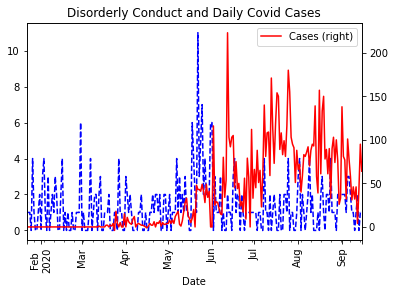

<Figure size 432x288 with 0 Axes>

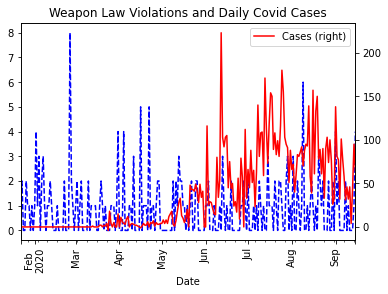

<Figure size 432x288 with 0 Axes>

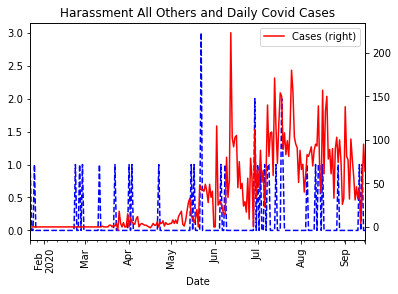

<Figure size 432x288 with 0 Axes>

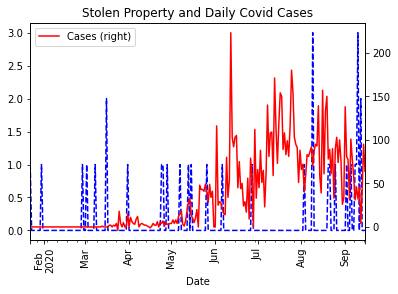

<Figure size 432x288 with 0 Axes>

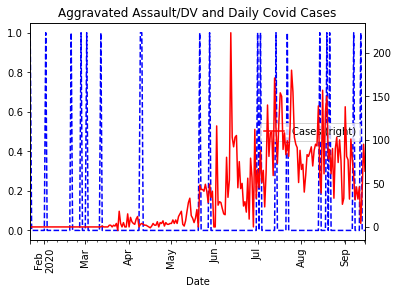

<Figure size 432x288 with 0 Axes>

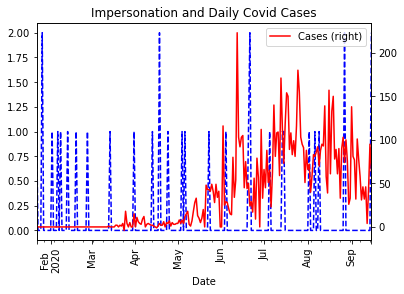

<Figure size 432x288 with 0 Axes>

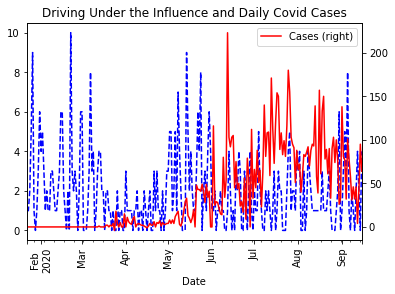

<Figure size 432x288 with 0 Axes>

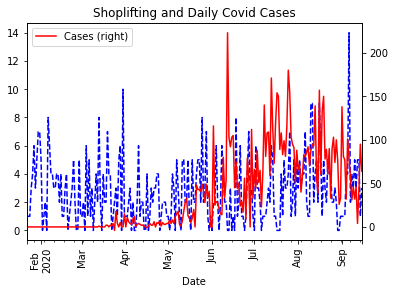

<Figure size 432x288 with 0 Axes>

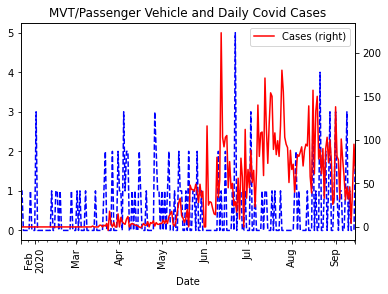

<Figure size 432x288 with 0 Axes>

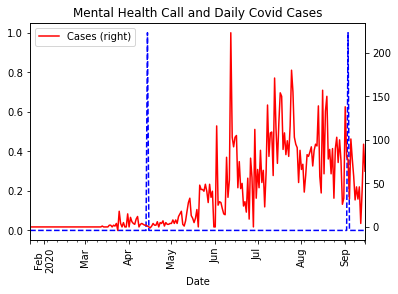

<Figure size 432x288 with 0 Axes>

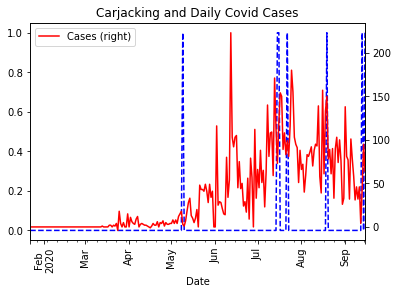

<Figure size 432x288 with 0 Axes>

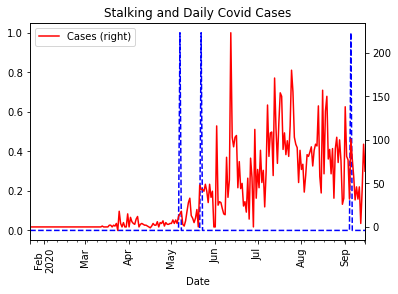

<Figure size 432x288 with 0 Axes>

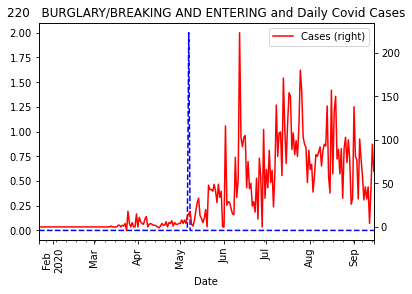

<Figure size 432x288 with 0 Axes>

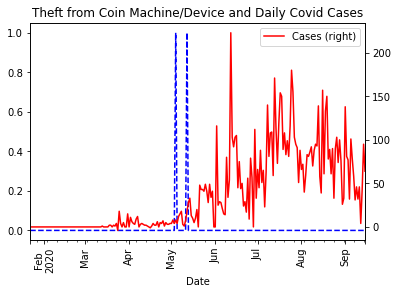

<Figure size 432x288 with 0 Axes>

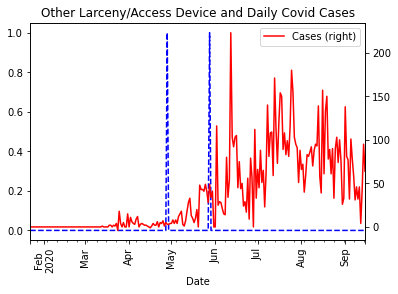

<Figure size 432x288 with 0 Axes>

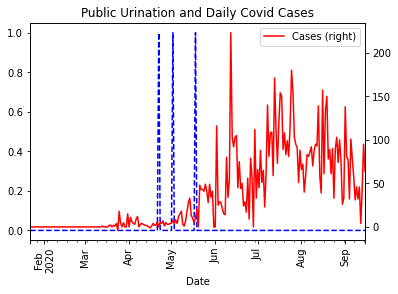

<Figure size 432x288 with 0 Axes>

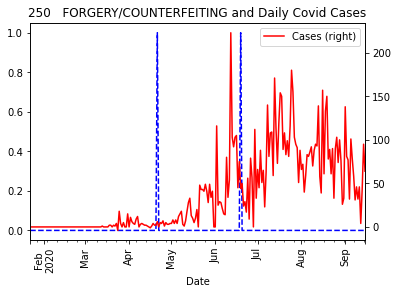

<Figure size 432x288 with 0 Axes>

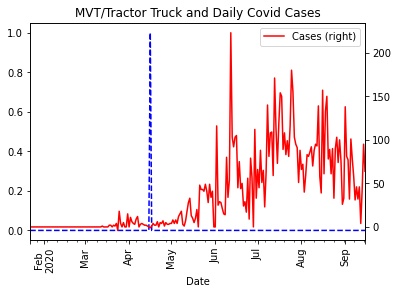

<Figure size 432x288 with 0 Axes>

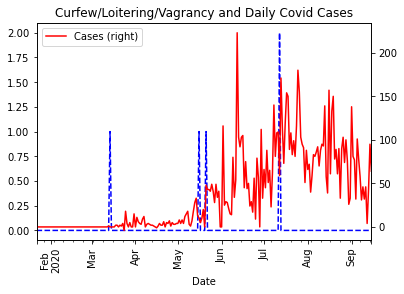

<Figure size 432x288 with 0 Axes>

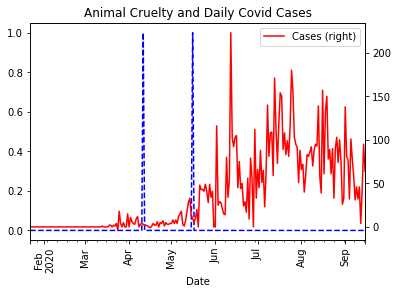

<Figure size 432x288 with 0 Axes>

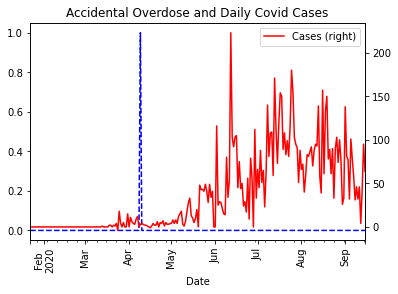

<Figure size 432x288 with 0 Axes>

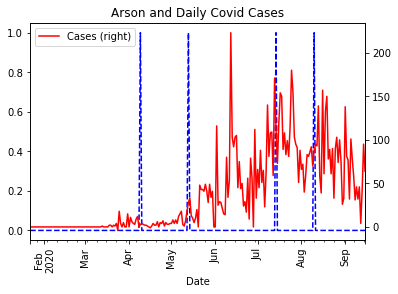

<Figure size 432x288 with 0 Axes>

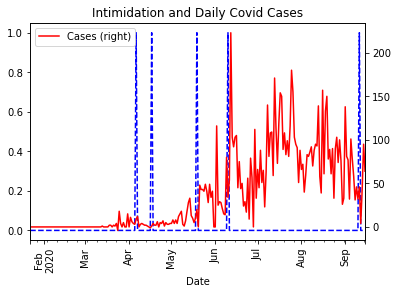

<Figure size 432x288 with 0 Axes>

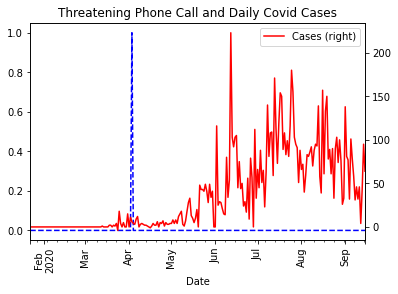

<Figure size 432x288 with 0 Axes>

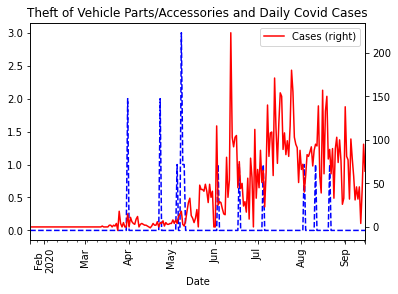

<Figure size 432x288 with 0 Axes>

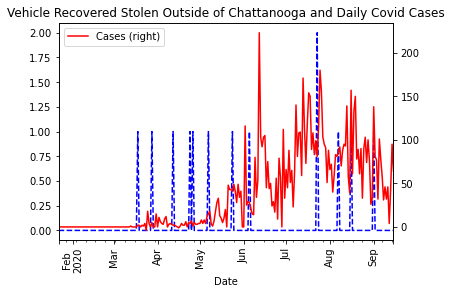

<Figure size 432x288 with 0 Axes>

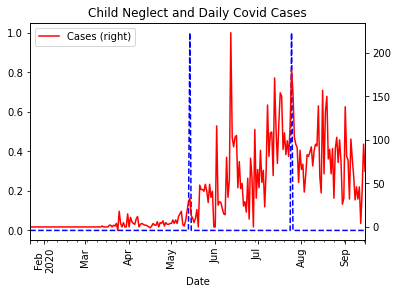

<Figure size 432x288 with 0 Axes>

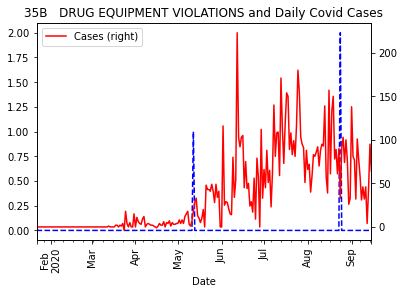

<Figure size 432x288 with 0 Axes>

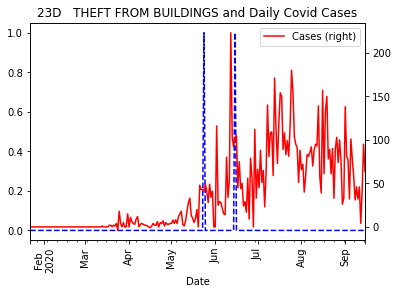

<Figure size 432x288 with 0 Axes>

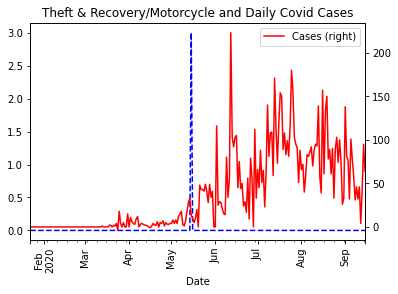

<Figure size 432x288 with 0 Axes>

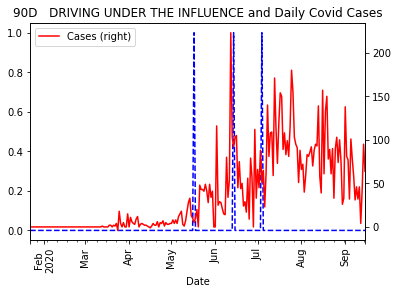

<Figure size 432x288 with 0 Axes>

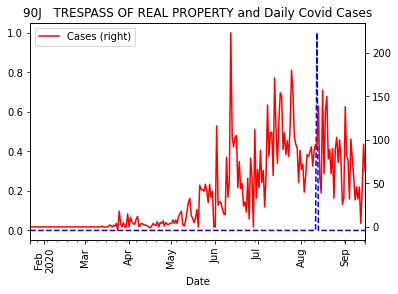

<Figure size 432x288 with 0 Axes>

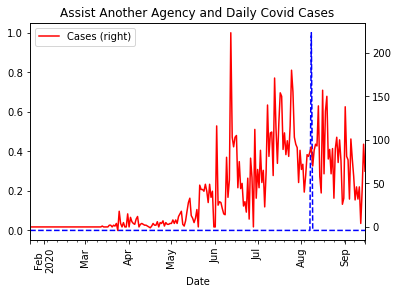

<Figure size 432x288 with 0 Axes>

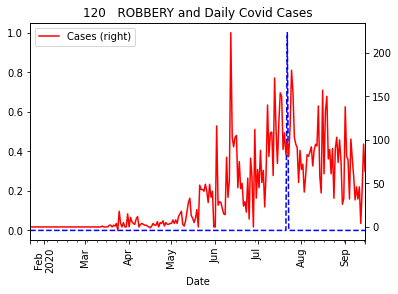

<Figure size 432x288 with 0 Axes>

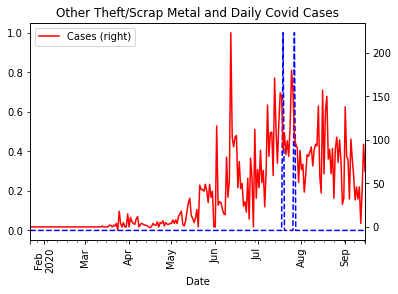

<Figure size 432x288 with 0 Axes>

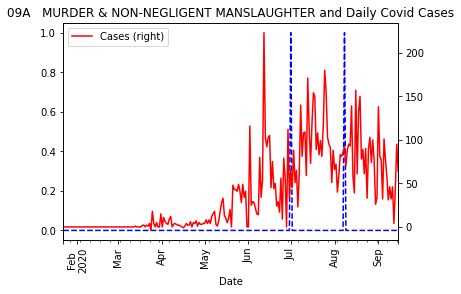

<Figure size 432x288 with 0 Axes>

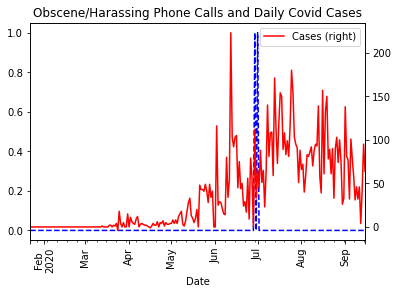

<Figure size 432x288 with 0 Axes>

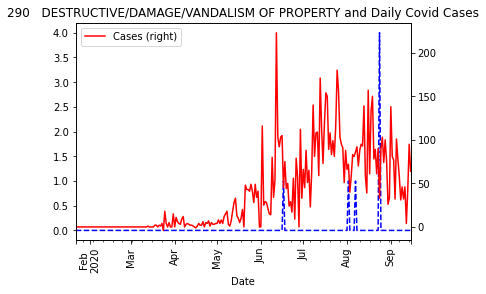

<Figure size 432x288 with 0 Axes>

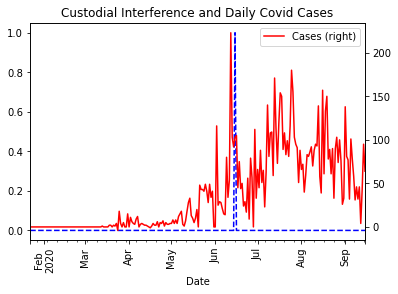

<Figure size 432x288 with 0 Axes>

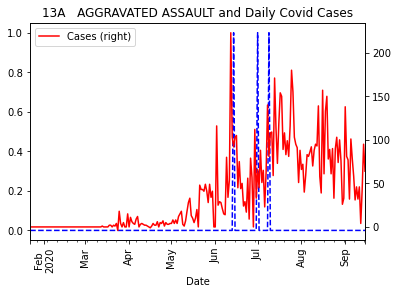

<Figure size 432x288 with 0 Axes>

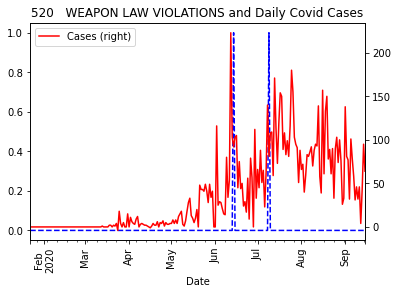

<Figure size 432x288 with 0 Axes>

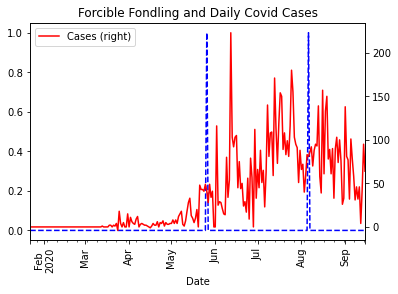

<Figure size 432x288 with 0 Axes>

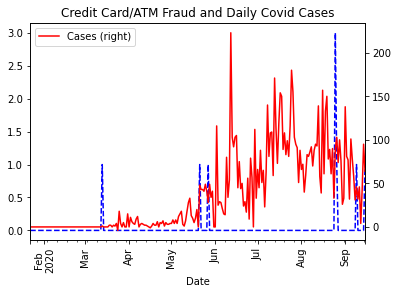

<Figure size 432x288 with 0 Axes>

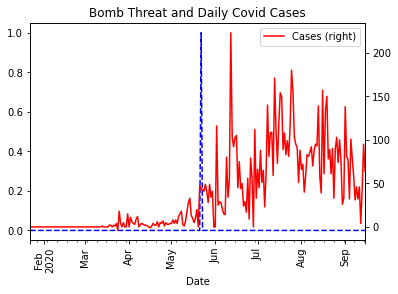

<Figure size 432x288 with 0 Axes>

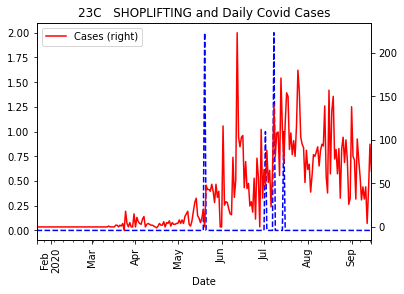

<Figure size 432x288 with 0 Axes>

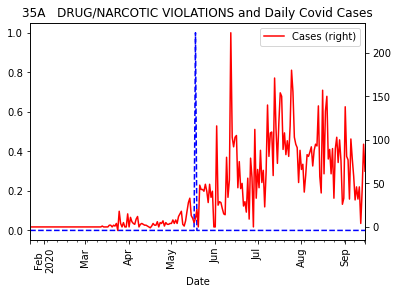

<Figure size 432x288 with 0 Axes>

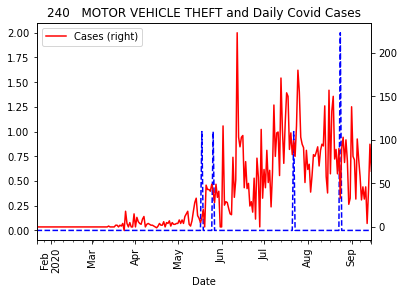

<Figure size 432x288 with 0 Axes>

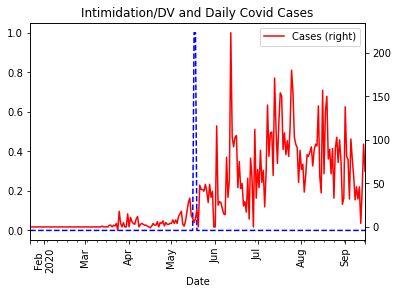

<Figure size 432x288 with 0 Axes>

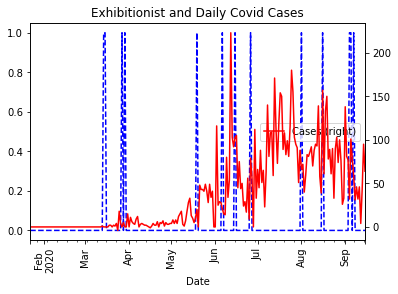

<Figure size 432x288 with 0 Axes>

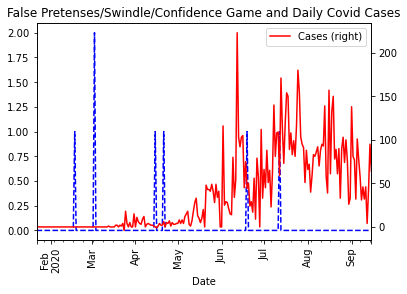

<Figure size 432x288 with 0 Axes>

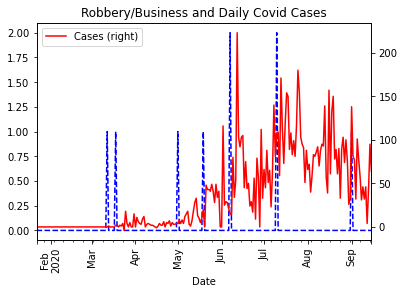

<Figure size 432x288 with 0 Axes>

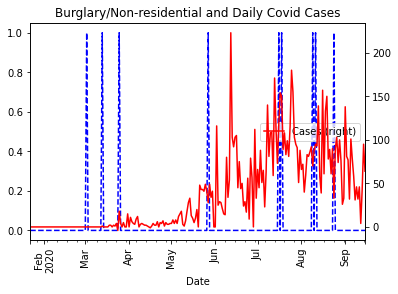

<Figure size 432x288 with 0 Axes>

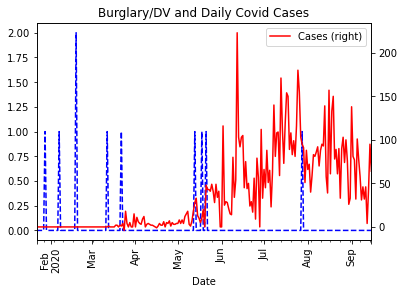

<Figure size 432x288 with 0 Axes>

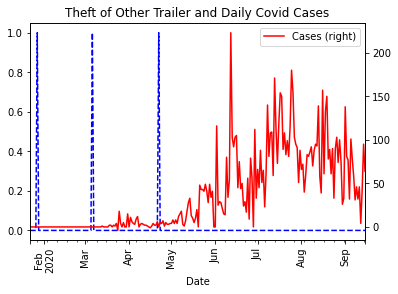

<Figure size 432x288 with 0 Axes>

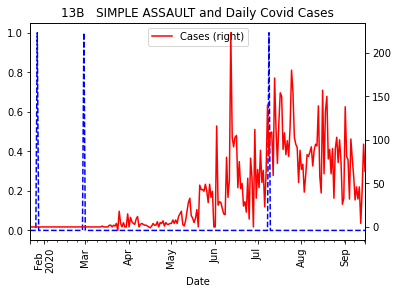

<Figure size 432x288 with 0 Axes>

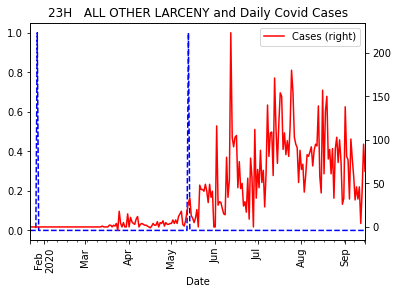

<Figure size 432x288 with 0 Axes>

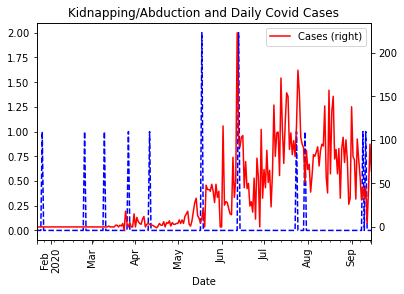

<Figure size 432x288 with 0 Axes>

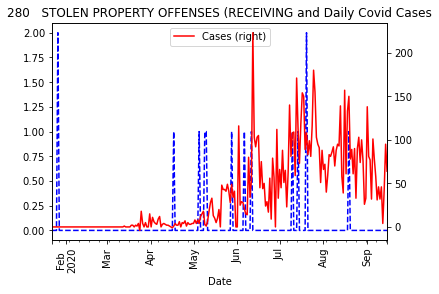

<Figure size 432x288 with 0 Axes>

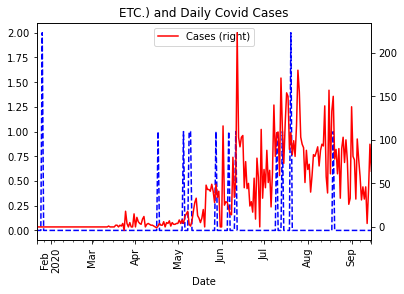

<Figure size 432x288 with 0 Axes>

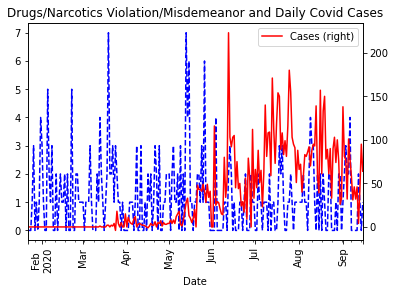

<Figure size 432x288 with 0 Axes>

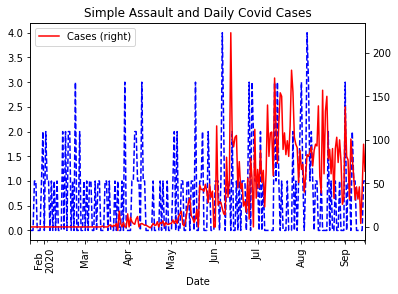

<Figure size 432x288 with 0 Axes>

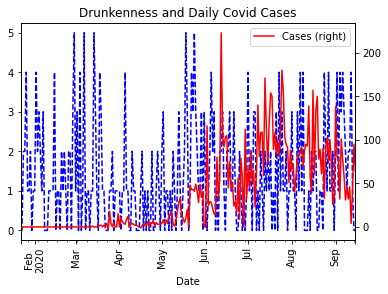

<Figure size 432x288 with 0 Axes>

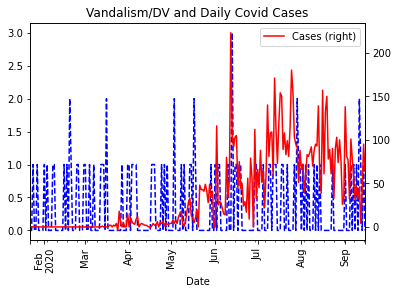

<Figure size 432x288 with 0 Axes>

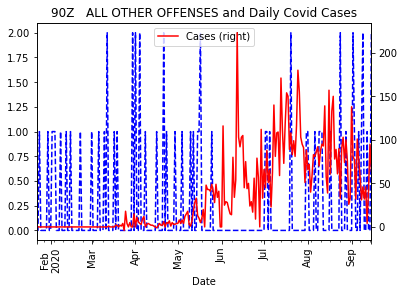

<Figure size 432x288 with 0 Axes>

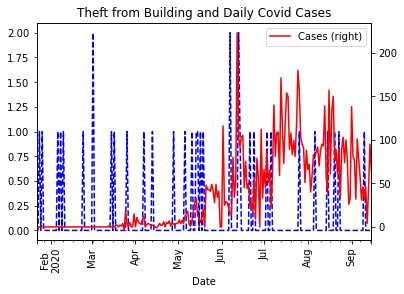

<Figure size 432x288 with 0 Axes>

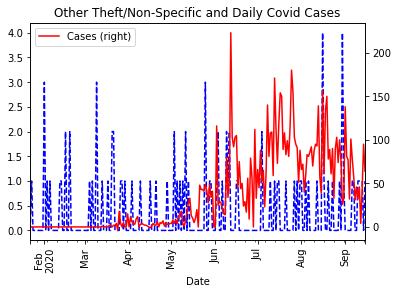

<Figure size 432x288 with 0 Axes>

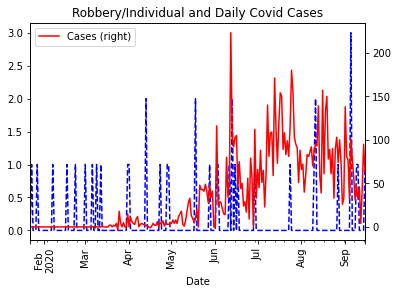

<Figure size 432x288 with 0 Axes>

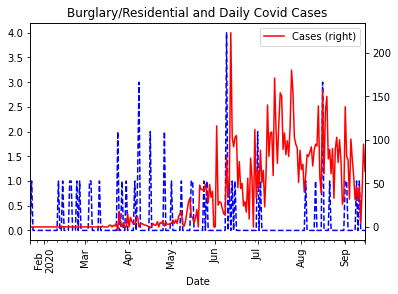

<Figure size 432x288 with 0 Axes>

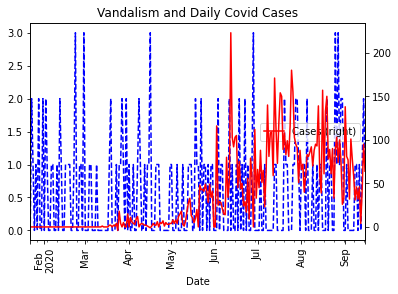

<Figure size 432x288 with 0 Axes>

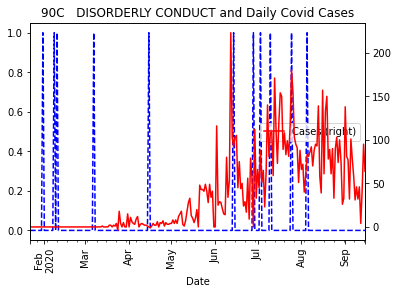

<Figure size 432x288 with 0 Axes>

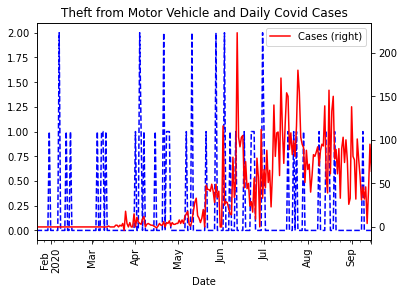

<Figure size 432x288 with 0 Axes>

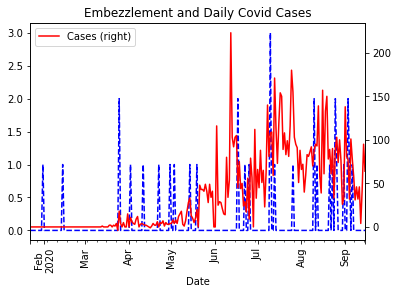

<Figure size 432x288 with 0 Axes>

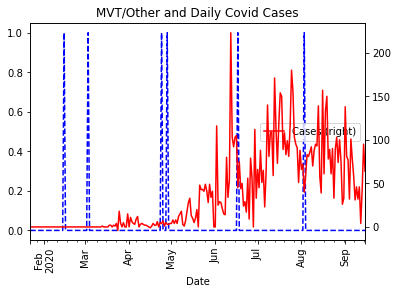

<Figure size 432x288 with 0 Axes>

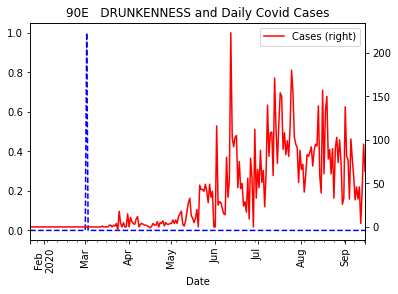

<Figure size 432x288 with 0 Axes>

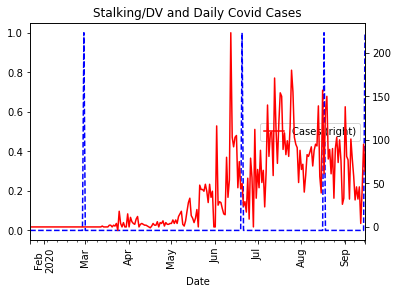

<Figure size 432x288 with 0 Axes>

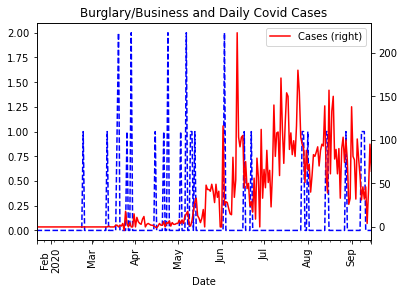

<Figure size 432x288 with 0 Axes>

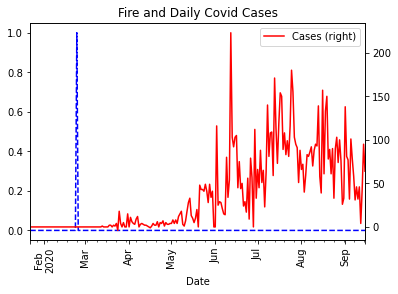

<Figure size 432x288 with 0 Axes>

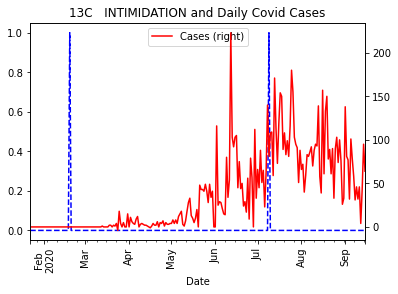

<Figure size 432x288 with 0 Axes>

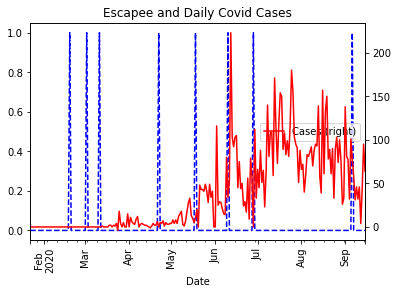

<Figure size 432x288 with 0 Axes>

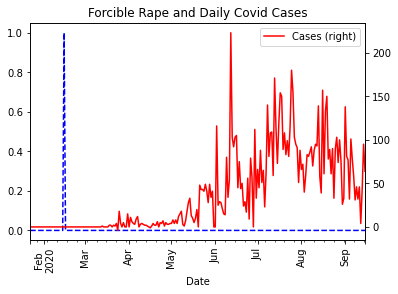

<Figure size 432x288 with 0 Axes>

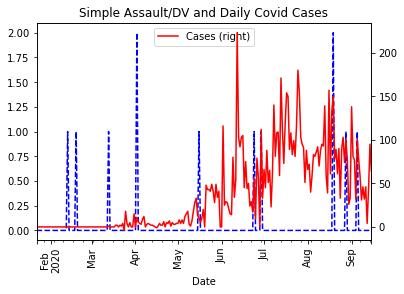

<Figure size 432x288 with 0 Axes>

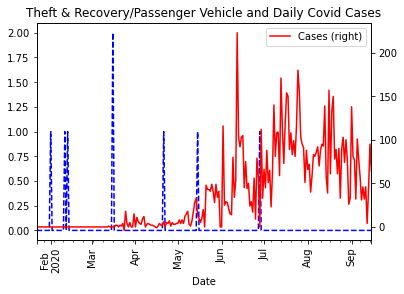

<Figure size 432x288 with 0 Axes>

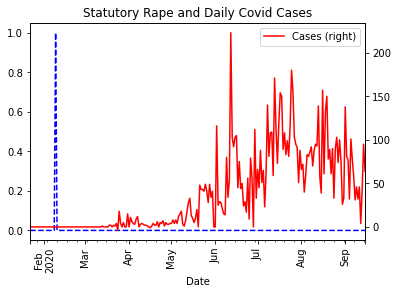

<Figure size 432x288 with 0 Axes>

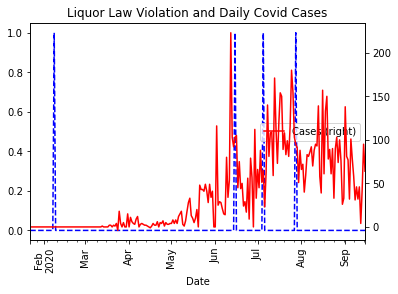

<Figure size 432x288 with 0 Axes>

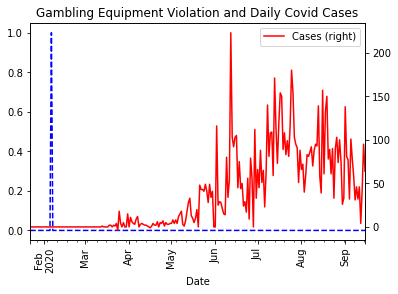

<Figure size 432x288 with 0 Axes>

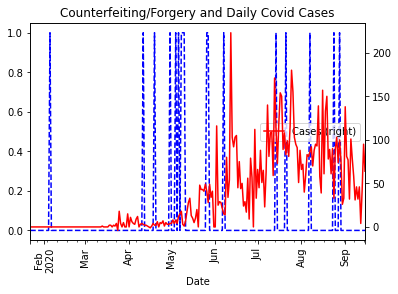

<Figure size 432x288 with 0 Axes>

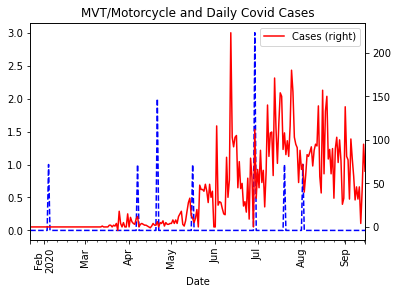

<Figure size 432x288 with 0 Axes>

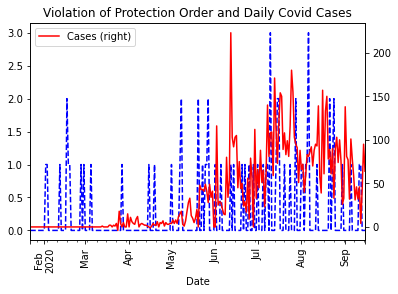

<Figure size 432x288 with 0 Axes>

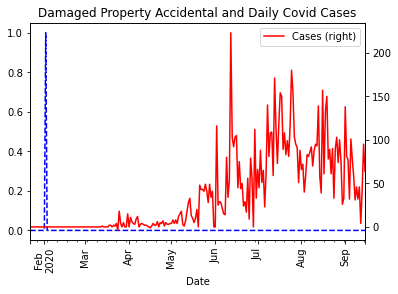

In [41]:
x = 'Dates'
# y = 'Frequency of Arrests'
plt.rcParams.update({'figure.max_open_warning': 0})
t = len(t_cpd_df.columns)
for crime in tqdm(t_cpd_df,total=t,desc='CPD/Covid Overlay Plots',unit='figures'):
    plt.figure()
    ax_cov = t_cov_df.plot(rot=90,secondary_y=True,style=['r']) #linestyle='--'
#     plt.ylabel(y)
    t_cpd_df[crime].plot(ax=ax_cov,rot=90,style=['b'],linestyle='--')
    plt.xlabel(x)
    plt.title(crime+' and Daily Covid Cases')
#     ax_cpd = t_cpd_df[crime].plot(rot=90,style=['b'])
#     t_cov_df.plot(ax=ax_cpd, style=['g'], linestyle='--')
#     plt.show()
plt.show()
plt.close('all') #close all figures to prevent memory leak

## 5 Discussion

As there were many plots and tables to look at in the Results section it may have been difficult to digest all the information. Some answers to the research questions and hypotheses were given in pieces here and there, but they will now be addressed directly, with relevant reference back to the code sections where graphical or tabular data can be found. In particular, section 4.3.3.3 will be used for reference considerably. If one desires to reference these plots themselves while following the discussion, a function and recommended plotting terms have been provided.

##### To run the visualization code in the following subsections, you first need to run sections 4.1, 4.2, 4.3.1, and 4.3.3.4

### 5.1 R1: Has crime shown a positive or negative trend during the uptick in Covid-19?

As can be seen in the TOTAL_DAILY_CRIMES plots of sections 4.3.3.1-3, crime before covid-19 was on the rise, with a significant upward trend. However, during the course of the pandemic, that trend has changed to a negative one, showing that crime has transitioned into a period of decline. This can be seen in many of the individual crime plots as well, especially the vehicular crimes, which were particularly affected by stay at home, lockdown, and quarantine orders.

##### Search for (individually): TOTAL_DAILY_CRIMES

Enter the name of the crime you wish to plot. Only intersecting crimes from both datasets are provided. For a list of crimes to search, enter /c. Partial search term matching is in effect.
Search for: total


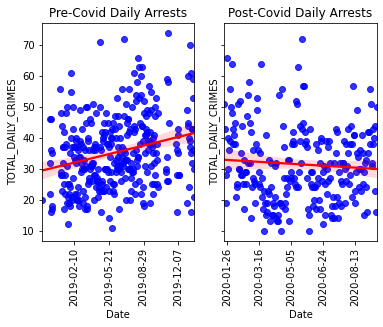

In [23]:
plot_by_crime()

### 5.2 R2: What crimes were most prevalent in Hamilton Co. before Covid-19?

Ignoring the uncommon/rare crimes unique to the pre-covid period as listed in section 4.3.3.4, there are various crimes that were more prevalent before the pandemic. Nearly all vehicular crimes were much more common before the pandemic, as would be expected given that movement has been restricted during the crisis due to either stay at home orders, sickness, fear of sickness, or reassignment to remote work/school.

Additionally, as can be seen in the plots of section 4.3.3.3, narcotics violations were more common, as were "miscellaneous" crimes- as vague as that is, as well as business burglary and serving warrants. To theorize about the reasons for these crimes, among others, being higher in the past, one must look at the nature of the crime.

Narcotics violations require police to discover the narcotics in the first place, which requires violators to interact with police in some way, which is obviously going to be reduced during a time of restricted travel and interaction. Miscellaneous crimes is too vague to confidently posit about, but if being a public nuisance with loud noises is "miscellaneous" then it would follow that the fewer opportunities one has to annoy others, the fewer "miscellaneous" charges will be pressed. Burglary requires breaking and entering, and the latter of those two activities is a Russian roulette game on whether the home owner is infected or not, so of course such crimes would diminish. Serving warrants requires police to find someone with a warrant on them, such as for driving on an expired license, which is going to be less common for previously covered reasons.

There are other crimes that have also seen an increase, but that much should be sufficient to show that numerous kinds of crimes were once more common than they are now.

##### Search for (individually): Driving, narcotics, misc, burglary, warrant

Enter the name of the crime you wish to plot. Only intersecting crimes from both datasets are provided. For a list of crimes to search, enter /c. Partial search term matching is in effect.
Search for: warrant


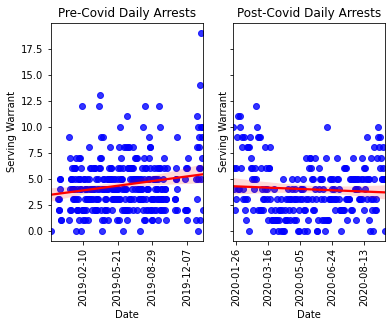

In [45]:
plot_by_crime()

### 5.3 R3: What crimes were most prevalent in Hamilton Co. after Covid-19?

A smaller collection of crimes saw increases after the pandemic began than before it, but nonetheless there were some examples. Many of them were on the low end of the frequency range, however, being fairly uncommon crimes regardless of the time period.

Surprisingly, car jacking of all things became more common during the pandemic than before it. Such can be seen in the relevant plot of section 4.3.3.3, and it can even be seen in the line plot overlay for car jacking in section 4.5.1, albeit only within the scope of the pandemic timeframe. 4.3.3.3 also shows that violation of protection orders has seen a notable increase in its upward trend during the pandemic as opposed to before it. That observation is particularly distressing, as it alludes to confirmation of hypothesis 2, wherein domestic violence/crime increases due to people being stuck indoors with each other for prolonged periods.

##### Search for (individually): Carjacking, protection

Enter the name of the crime you wish to plot. Only intersecting crimes from both datasets are provided. For a list of crimes to search, enter /c. Partial search term matching is in effect.
Search for: protection


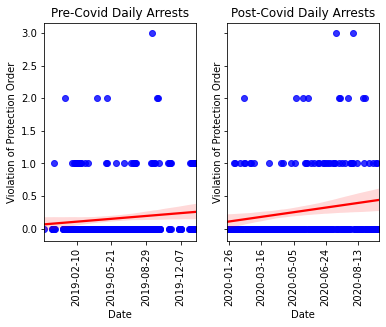

In [48]:
plot_by_crime()

### 5.4 H1: Lesser crimes (drunkenness, shoplifting) will be more prevalent during the pandemic.

Contrary to what may have been stated in an earlier Results section, drunkenness is not necessarily more prevalent during the pandemic in terms of frequency, but it is most certainly on the rise compared to how it was before the pandemic. Its trend is upward, as opposed to the downward trend of pre-covid Hamilton co. Interestingly enough, however, shoplifting has seen very little change in its frequency from day to day by a cursory glance at the scatter plot of 4.3.3.3, and its trend hasn't shown much change either. It was predicted that shoplifting would become more prevalent during the pandemic than before, but rather, it has stayed relatively the same. As such, this hypothesis is only partially correct. Other examples of minor crimes or misdemeanors may exist in the data as well, but these were the two targeted for analysis.

##### Search for (individually): Drunk, shoplift

Enter the name of the crime you wish to plot. Only intersecting crimes from both datasets are provided. For a list of crimes to search, enter /c. Partial search term matching is in effect.
Search for: shoplift


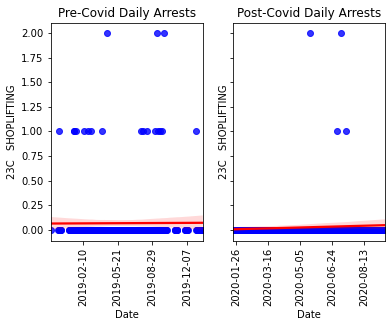

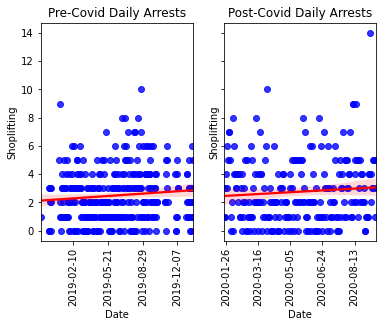

In [50]:
plot_by_crime()

### 5.5 H2: Domestic crime will see an increase during the pandemic.

The closest measure of domestic violence that the CPD dataset has comes in the violation of protection orders and child neglect crimes. The latter is extremely uncommon both before and after the pandemic arrived, so it will not be considered. The former, which does not necessarily imply domestic violence, is at least very inclusive of it. As such, analyzing violation of protection orders, or as they're more commonly known, restraining orders, could reveal whether domestic violence has been on the rise.

Sadly, as has been covered in previous text, this is the case. Both the frequency and trend of protection order violations has been on the rise during the pandemic compared to prior to it. Again, this is most certainly related to stay at home orders and the high tension resulting from the pandemic. Other researchers studying the pandemic and its relation to crime have come to similar conclusions, finding that crimes committed by single persons, such as murder or intimate violent, have on average stayed constant or become more common. [5]

##### Search for (individualy): Protection

Enter the name of the crime you wish to plot. Only intersecting crimes from both datasets are provided. For a list of crimes to search, enter /c. Partial search term matching is in effect.
Search for: protection


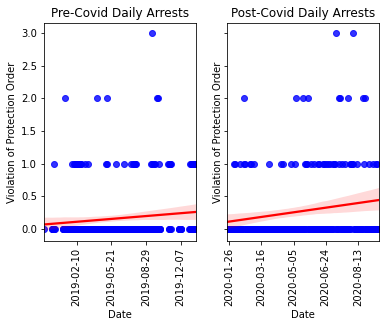

In [51]:
plot_by_crime()

### 5.6 Future Study

It is to the belief of the author that the findings of this study could be useful primarily within the city of Chattanooga, TN, where the data holds the most relevance as a measure of a pandemic's effect on arrest rates and, by extrapolation, crime rates. Future study of this topic would hopefully only need to be performed on the Covid-19 data after the populace has been vaccinated against it, and thus the avenues for further application of these findings in research are limited to what data is produced by the current pandemic. One very interesting direction to take the research is a post-pandemic analysis of the virus' effect on normal rates of driving-related crimes and domestic issues. If the virus ends up changing societal norms in terms of the rates of these kinds of crimes, that would be an insightful piece of information, and the same applies to the reverse as well.

## 6 Conclusions

Crime in Chattanooga, TN has long been a subject of the masses. Some of the city's more prominent recent history has been marked by crime prevention activities on the part of mayor Andy Berke [6], and the citizenry has been aware of these problems all along the way. However, as we are all absorbed night and day by the evolving global health crisis of Covid-19, we may come to forget about such things. Doing so does more harm than good, and thus, it is important to understand how this pandemic has impacted crime in the city so that we may be better prepared to deal with it in the future.

This study concludes a handful of things about the crime in Chattanooga and how Covid-19 has impacted it. Naturally, it has decreased in its prevalence overall, with common crimes that citizens would worry about, like traffic offenses, going down. However, the stresses of a pandemic-besieged world have driven many more to drink, and petty crimes like shoplifting remain a threat despite the contagious conditions. Additionally, crimes we often cannot see, such as domestic violence, have become noticeably worse as a result of the restrictive living conditions all citizens must abide by.

Keeping these thoughts in mind, we should move forward as a community to help each other cope with these tough conditions without resorting to self-destructive or anti-social behavior. The wellfare of the city is on our shoulders now more than ever, and with covid-19 not slowing down in the slightest, it will only become more rigorous from here on out.

## 7 References

1. Ryan Wedell, "Public CPD Arrests," https://www.chattadata.org/Public-Safety/Public-CPD-Arrests/hhdc-a448
2. CSSEGISandData, "time_series_covid19_confirmed_US," https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
3. Wyatt Massey, "August becomes deadliest month for COVID-19 in Hamilton County, but spread is slowing," https://www.timesfreepress.com/news/local/story/2020/aug/31/august-becomes-deadliest-month-covid-19-hamil/531238/#/questions
4. Dennis Wooden, "Needed Police Reform - And Response (2)," https://www.chattanoogan.com/2020/10/1/416038/Needed-Police-Reform---And-Response.aspx
5. Boman, J.H., Gallupe, O. Has COVID-19 Changed Crime? Crime Rates in the United States during the Pandemic. Am J Crim Just 45, 537–545 (2020). https://doi.org/10.1007/s12103-020-09551-3
6. WRCBtv, "Berke pledges to cut Chattanooga crime rate as mayor," https://www.wrcbtv.com/story/18768600/berke-pledges-to-cut-chattanooga-crime-rate-as-mayor